
### Project 2: Predicting sale prices of houses in Ames, Iowa
Part 1 of 2: Data cleaning, EDA, and preprocessing (current)

Part 2 of 2: Modeling, feature selection, and prediction


Introduction
In this project, my goal is to develop a regression model that will make accurate predictions of the sale prices of houses in the city of Ames in Iowa, USA.

The benefits of obtaining accurate house price predictions are to allow home owners to better sell their houses at a better price and also developers to build a house based on the features that increase the salesprice.

Through a regression model, we will also be able to identify some features that increase or decrease the value of a house. With this knowledge, property developers could better understand which features to include or exclude in future developments. They would already have domain expertise in this area, and a regression model could help to reinforce what they already know and perhaps reveal things that are less apparent.

The project involves analysing the Ames Housing Dataset, which is composed of over 2,900 records of properties transacted in Ames between 2006-2010. The 2,900 records are split between two separate train (2,051 records) and test (879 records) datasets.

Each instance comprises 78 features of four different data types: Nominal, Categorical, Continuous, and Discrete.

The target variable in our analysis is the SalePrice of the house.

To simplify my model, my aim will be to identify only the top 20-30 factors that influence the value of a house.

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [281]:

# set option to display all the columns available
pd.set_option("display.max_columns", None)

In [282]:
# read in train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# remove spaces in column names
train.columns = [x.replace(' ', '') for x in train.columns]
test.columns = [x.replace(' ', '') for x in test.columns]

In [283]:
train.sample(5)

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
957,582,534127170,20,RL,NaN,9156,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,1Story,6,7,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1489.0,1489.0,GasA,Gd,Y,SBrkr,1489,0,0,1489,0.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,1968.0,RFn,2.0,462.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,185750
152,632,535152230,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,3,1957,1957,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,189.0,Rec,661.0,628.0,1478.0,GasA,Gd,Y,SBrkr,1478,0,0,1478,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,2.0,442.0,TA,TA,Y,114,0,0,0,216,0,NaN,NaN,NaN,0,6,2009,WD,156500
67,2833,908188150,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,117.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,976.0,976.0,GasA,Ex,Y,SBrkr,976,732,0,1708,0.0,0.0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2.0,380.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,130000
1068,191,902403070,70,RM,60.0,10560,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,7,1922,1994,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Rec,283.0,Unf,0.0,455.0,738.0,GasA,Ex,Y,SBrkr,868,602,0,1470,0.0,0.0,1,1,2,1,TA,6,Min1,0,NaN,Detchd,1970.0,Unf,2.0,624.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,140750
678,1965,535453150,20,RL,70.0,7315,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1958,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,625.0,Unf,0.0,545.0,1170.0,GasA,TA,Y,SBrkr,1170,0,0,1170,0.0,1.0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1958.0,RFn,1.0,338.0,TA,TA,Y,0,0,0,0,225,0,NaN,NaN,NaN,0,3,2007,WD,140000


In [284]:

train.shape

(2051, 81)

In [285]:
train.describe(include='all')

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051,1721.000000,2051.000000,2051,140,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051.000000,2051.000000,2051.000000,2051.000000,2051,2051,2051,2051,2029,2029.000000,2051,2051,2051,1996,1996,1993,1996,2050.000000,1995,2050.000000,2050.000000,2050.000000,2051,2051,2051,2051,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051,2051.000000,2051,2051.000000,1051,1938,1937.000000,1937,2050.000000,2050.000000,1937,1937,2051,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,9,400,65,2051.000000,2051.000000,2051.000000,2051,2051.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,6,15,15,4,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,5,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,8,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,NaN,NaN,NaN,9,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,NaN
freq,NaN,NaN,NaN,1598,NaN,NaN,2044,85,1295,1843,2049,1503,1953,310,1767,2025,1700,1059,NaN,NaN,NaN,NaN,1619,2025,724,721,1218,NaN,1247,1778,926,887,1834,1339,615,NaN,1749,NaN,NaN,NaN,2018,1065,1910,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1047,NaN,1915,NaN,523,1213,NaN,849,NaN,NaN,1832,1868,1861,NaN,NaN,NaN,NaN,NaN,NaN,4,227,56,NaN,NaN,NaN,1781,NaN
mean,1474.033642,7.135900e+08,57.008776,NaN,69.055200,10065.208191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.112140,5.562165,1971.708922,1984.190151,NaN,NaN,NaN,NaN,NaN,99.695909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.300488,NaN,47.959024,567.728293,1057.987805,NaN,NaN,NaN,NaN,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,NaN,6.435885,NaN,0.590931,NaN,NaN,1978.707796,NaN,1.776585,473.671707,NaN,NaN,NaN,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,NaN,NaN,NaN,51.574354,6.219893,2007.775719,NaN,181469.701609
std,843.980841,1.886918e+08,42.824223,NaN,23.260653,6742.488909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426271,1.104497,30.177889,21.036250,NaN,NaN,NaN,NaN,NaN,174.963129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461.204124,NaN,165.000901,444.954786,449.410704,NaN,NaN,NaN,NaN,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,NaN,1.560225,NaN,0.638516,NaN,NaN,25.441094,NaN,0.764537,215.934561,NaN,NaN,NaN,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,NaN,NaN,NaN,573.393985,2.744736,1.312014,NaN,79258.659352
min,1.000000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.00000

In [286]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2051 non-null   int64  
 1   PID            2051 non-null   int64  
 2   MSSubClass     2051 non-null   int64  
 3   MSZoning       2051 non-null   object 
 4   LotFrontage    1721 non-null   float64
 5   LotArea        2051 non-null   int64  
 6   Street         2051 non-null   object 
 7   Alley          140 non-null    object 
 8   LotShape       2051 non-null   object 
 9   LandContour    2051 non-null   object 
 10  Utilities      2051 non-null   object 
 11  LotConfig      2051 non-null   object 
 12  LandSlope      2051 non-null   object 
 13  Neighborhood   2051 non-null   object 
 14  Condition1     2051 non-null   object 
 15  Condition2     2051 non-null   object 
 16  BldgType       2051 non-null   object 
 17  HouseStyle     2051 non-null   object 
 18  OverallQ

##  Brief description of dataset


There are 2051 records and 81 columns in total for the train dataset.
All columns except Id, PID and SalePrice are feature variables.
SalePrice is the target variable that we are trying to make predictions for.
There are several columns with missing values, which we will further investigate and either drop them from our analysis or perform imputation for the missing values.
The feature variables consists of all 4 datatypes:

Categorical

Nominal – non-numerical values without any order, e.g. Neighborhood (Physical locations within Ames city limits)
Ordinal – non-numerical values with order, e.g. ExterCond (Present condition of the material on the exterior, from Poor to Excellent)

Numerical

Discrete, e.g. Fireplaces (Number of fireplaces)
Continuous, e.g. GrLivArea (Above grade (ground) living area square feet)
As we can only pass numerical input into our regression models later, we will need to perform one-hot encoding to create dummy variable columns the nominal variables. For ordinal variables, we will perform ordinal encoding and map each unique label to an integer value.




## Data cleaning


### Drop columns with a high % of missing values

In [287]:
# count number of missing values in column
count = train.isna().sum().sort_values(ascending=False)

# calculate % of missing values in column
pct = (train.isna().sum() / len(train)).sort_values(ascending=False)

# merge the two Series into a DataFrame
null_values = pd.concat([count, pct], axis=1, keys=['count_missing', 'percent_missing'])

# see the columns with at least 1 missing value
filtered = null_values[null_values['count_missing'] > 0]
filtered.head(10)

,count_missing,percent_missing
PoolQC,2042,0.995612
MiscFeature,1986,0.968308
Alley,1911,0.931741
Fence,1651,0.804973
FireplaceQu,1000,0.487567
LotFrontage,330,0.160897
GarageFinish,114,0.055583
GarageCond,114,0.055583
GarageQual,114,0.055583
GarageYrBlt,114,0.055583


In [288]:
# Let's drop columns 'PoolQC', 'MiscFeature', 'Alley' and 'Fence' since they have >80% missing values
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

### Impute missing values for the remaining columns¶

In [289]:
# check and see missing values again
count = train.isna().sum().sort_values(ascending=False)
pct = (train.isna().sum() / len(train)).sort_values(ascending=False)
null_values = pd.concat([count, pct], axis=1, keys=['count', 'percent'])
filtered = null_values[null_values['count'] > 0]
filtered

,count,percent
FireplaceQu,1000,0.487567
LotFrontage,330,0.160897
GarageYrBlt,114,0.055583
GarageFinish,114,0.055583
GarageQual,114,0.055583
GarageCond,114,0.055583
GarageType,113,0.055095
BsmtExposure,58,0.028279
BsmtFinType2,56,0.027304
BsmtQual,55,0.026816



### Summary of missing values and actions to be taken¶


LotFrontage	Numerical	This refers to 'linear feet of street connected to property'
and it is unlikely that a lot will have no street connection.
Hence no 0 values makes sense and we should not fill null values with 0.	Since the area of each street connected to the house property
most likely have a similar area to other houses in its neighborhood,
we can fill in missing values by the median LotFrontage of the neighborhood.

In [290]:
# create a list of columns to fill NA values with 0
fill_zero_cols = ['GarageYrBlt', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 
                  'GarageCars', 'GarageArea', 'BsmtHalfBath', 'BsmtFullBath']

In [291]:
# fill columns with 0
for col in fill_zero_cols:
    train[col] = train[col].fillna(0)

In [292]:
# create a list of columns to fill NA values with None
fill_none_cols = ['FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'BsmtExposure', 
                  'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']

In [293]:
# fill columns with None
for col in fill_none_cols:
    train[col] = train[col].fillna('None')

In [294]:
# For LotFrontage, impute missing values with the median LotFrontage of the neighborhood the house is located in
train['LotFrontage'] = train['LotFrontage'].fillna(train.groupby('Neighborhood')['LotFrontage'].transform('median'))

In [295]:
# There are still 3 missing values because these houses are the only ones in their neighborhood.
train.loc[train['LotFrontage'].isna()]

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
463,2257,916253320,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,0,9,2007,WD,330000
1121,2789,907230240,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,None,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,0,6,2006,WD,137000
1211,2893,916252170,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,0,11,2006,WD,230000


In [296]:
# fill these 3 rows' LotFrontage with the median of the entire LotFrontage column
train['LotFrontage'] = train['LotFrontage'].fillna(train.LotFrontage.median())

In [297]:
# check and see if there are any missing values left
train.isna().sum()

Id             0
PID            0
MSSubClass     0
MSZoning       0
LotFrontage    0
              ..
MiscVal        0
MoSold         0
YrSold         0
SaleType       0
SalePrice      0
Length: 77, dtype: int64


Now, let's properly visualise and explore our data


Scatterplots of SalePrice against numerical features¶

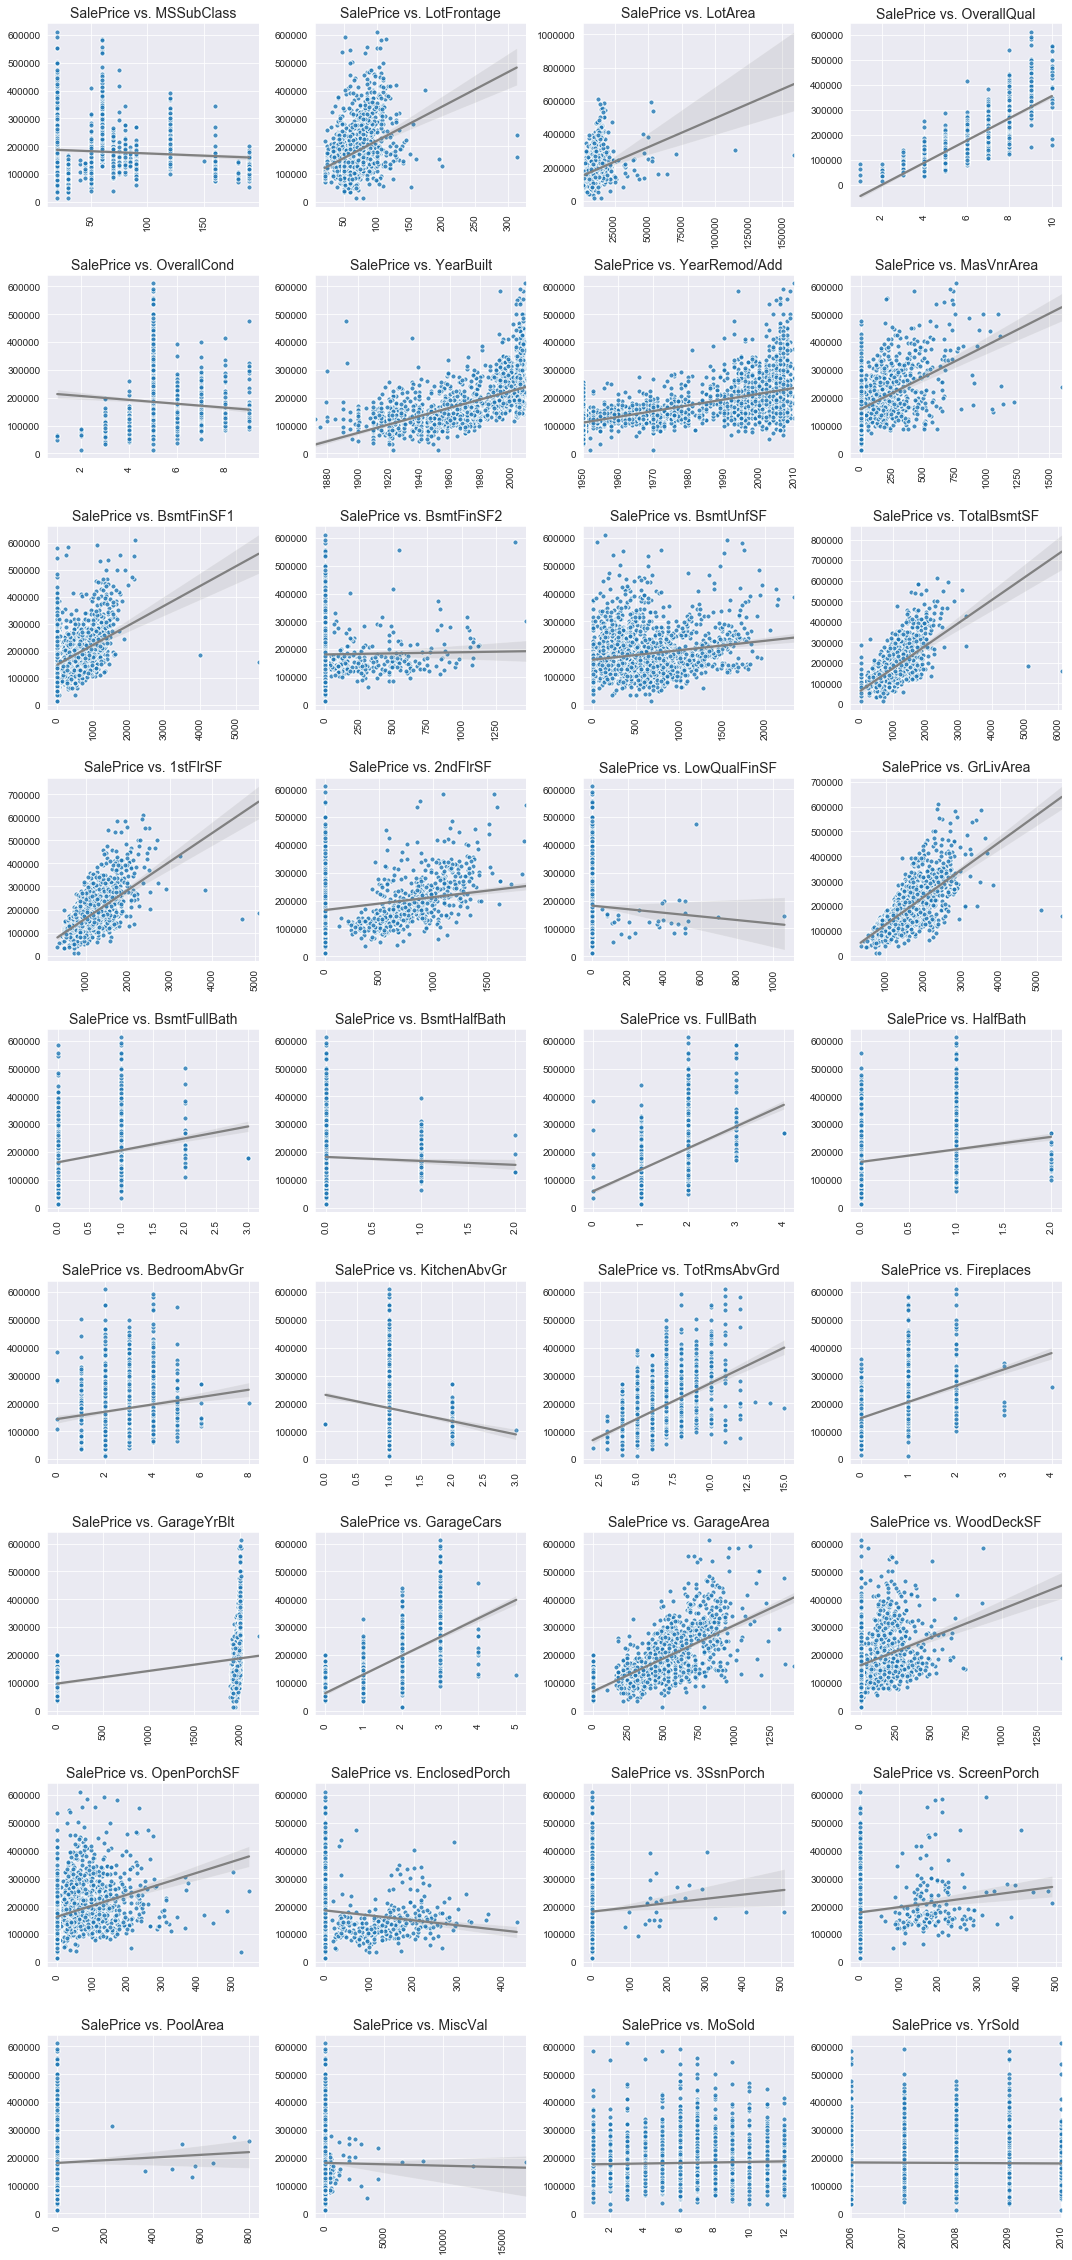

In [298]:
# select all the columns that are not of 'object' datatype.
# some categorical variables (like MSSubClass) will end up in this list because they have numerical values. that's ok.
num_cols = train.select_dtypes(exclude='object').drop(columns=['Id', 'PID', 'SalePrice']).columns

# calculate number of rows needed in the figure given 4 columns
nrows = int(np.ceil(len(num_cols)/4)) 

# create a figure
fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 

# flatten the axes array
ax = ax.ravel() 

# loop through the numerical columns and plot a scatterplot for each of them
for i, col in enumerate(num_cols): 
    sns.regplot(y=train['SalePrice'], x=train[col],ax=ax[i], \
                    scatter_kws={"s": 25, 'edgecolor':'white'},
                    line_kws = {'color':'grey'})
    ax[i].set_title(f'SalePrice vs. {col}',fontsize=14)  
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].set_xlabel(None, fontsize=14)
    ax[i].set_ylabel(None)
    plt.tight_layout()


Observation 1: GrLivArea is the sum of 1stFlrSF and 2ndFlrSF. GrLivArea has a stronger linear relationship with SalePrice than either of the two columns, so let's drop 1stFlrSF and 2ndFlrSF.

In [299]:
train.drop(columns=['1stFlrSF', '2ndFlrSF'], inplace=True)

Observation 2: TotalBsmtSF is the sum of BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF. TotalBsmtSF has a stronger linear relationship with SalePrice than any of the individual columns, so let's drop these columns too.

In [300]:
train.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace=True)


Observation 3: There are two outliers for TotalBsmtSF that we should remove. These are likely the same two outliers that are present in GrLivArea.


Let's combine TotalBsmtSF and GrLivArea to get TotalSF of a house and see if that produces a stronger correlation to SalePrice than TotalBsmtSF or GrLivArea alone.

In [301]:
# delete the two outlier values in GrLivArea column
train.drop(index=train[train['GrLivArea'] > 5000].index, axis=0, inplace=True)

In [302]:
# create TotalSF column
train['TotalSF'] = train['GrLivArea'] + train['TotalBsmtSF']

In [303]:
# check correlation to SalePrice
train[['TotalSF', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']].corr()['SalePrice']

TotalSF        0.825818
TotalBsmtSF    0.665116
GrLivArea      0.719463
SalePrice      1.000000
Name: SalePrice, dtype: float64

Observation 3: There are two outliers for TotalBsmtSF that we should remove. These are likely the same two outliers that are present in GrLivArea.

In [304]:
# delete the two outlier values in GrLivArea column
train.drop(index=train[train['GrLivArea'] > 5000].index, axis=0, inplace=True)

As seen from the correlation coefficients, TotalSF has the highest correlation to SalePrice, let's keep this column and drop TotalBsmtSF and GrLivArea.

In [305]:

train.drop(columns=['TotalBsmtSF', 'GrLivArea'], inplace=True)


Observation 4: GarageYrBlt doesn't have much variance in its data and does not help us predict SalePrice. A cursory check also seems to show that the year in which the garage was built is the same as the year in which the house was built, so it is essentially redundant information that we can drop.

In [306]:
train.drop(columns='GarageYrBlt', inplace=True)

Observation 5: It is not clear what information the column MiscVal contains and it also does not show a linear relationship with SalePrice. Let's drop this column.

In [307]:
train.drop(columns='MiscVal', inplace=True)

Observation 6: There are many 0 values in LowQualFinSF (Low quality finished square feet (all floors)), and it has no linear relationship with SalePrice. Let's drop this column.

In [308]:
train.drop(columns='LowQualFinSF', inplace=True)

Observation 7: WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, and PoolArea do not show a linear relationship with SalePrice. We can convert them into binary columns instead to indicate presence (or absence) of a pool, wood deck, and porch (regardless of the type of porch). For the porch columns, let's combine them all into a binary column HasPorch.

In [309]:
train['HasPorch'] = np.where(train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis=1) > 0, 1, 0)

In [310]:
train['HasWoodDeck'] = np.where((train['WoodDeckSF'] != 0), 1, 0)

In [311]:
train['HasPool'] = np.where((train['PoolArea'] != 0), 1, 0)


In [312]:
# Drop the original columns
train.drop(columns=['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'], inplace=True)


Observation 8: YrSold and MoSold do not show any relationship with SalePrice. Let's create a new feature called HouseAge instead, calculated by YrSold – YearBuilt. Thereafter, let's drop YrSold and MoSold from the dataset.

In [313]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

In [314]:
train['HouseAge'].describe()

count    2049.000000
mean       36.102489
std        30.204176
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: HouseAge, dtype: float64

Let's also create a column called HouseNewAge, calculated by YrSold – YearRemod/Add and see it has a stronger correlation with SalePrice than HouseAge.

In [315]:
train['HouseNewAge'] = train['YrSold'] - train['YearRemod/Add']

In [316]:
train[['HouseNewAge', 'HouseAge', 'SalePrice']].corr()['SalePrice']

HouseNewAge   -0.552226
HouseAge      -0.572441
SalePrice      1.000000
Name: SalePrice, dtype: float64

Seems like HouseAge has a stronger correlation. Let's drop HouseNewAge, along with YrSold and MoSold.

In [317]:
train.drop(columns=['YrSold', 'MoSold', 'HouseNewAge'], inplace=True)

In [318]:
# check correlation
train[['YearBuilt', 'YearRemod/Add', 'HouseAge', 'SalePrice']].corr()

,YearBuilt,YearRemod/Add,HouseAge,SalePrice
YearBuilt,1.000000,0.628613,-0.999055,0.572405
YearRemod/Add,0.628613,1.000000,-0.626059,0.550872
HouseAge,-0.999055,-0.626059,1.000000,-0.572441
SalePrice,0.572405,0.550872,-0.572441,1.000000


Let's drop YearBuilt since it will have the same but inverse relationship with SalePrice as HouseAge.

In [319]:
train.drop(columns=['YearBuilt'], inplace=True)

Observation 9: KitchenAbvGr, which refers to the number of kitchens in a house, does not show a linear relationship with SalePrice either. Let's check its correlation with SalePrice before deciding whether to drop this column.

In [320]:
train[['SalePrice', 'KitchenAbvGr']].corr()

,SalePrice,KitchenAbvGr
SalePrice,1.000000,-0.125472
KitchenAbvGr,-0.125472,1.000000


According to the correlation coefficient, an additional kitchen will reduce the sale price of a house, which does not make intuitive sense.

Based on the plot of KitchenAbvGr against SalePrice, we can see that most of the houses in our dataset have only 1 kitchen. As a result, there is a wider range of sale prices for these homes. Although the houses with 2 kitchens were sold at a lower range of prices, this does not necessarily mean that houses with more kitchens will be sold at a lower price.

To avoid sending noise to our model, let's drop this column.

In [321]:
train.drop(columns='KitchenAbvGr', inplace=True)


Observation 10: There are four variables for bathrooms, i.e. BsmtFullBath, BsmtHalfBath, FullBath, and HalfBath. To reduce complexity, let's try combining them.

In [322]:
# Total number of full bathrooms in the house
train['TotalFullBath'] = train['FullBath'] + train['BsmtFullBath']

# Total number of half bathrooms in the house
train['TotalHalfBath'] = train['HalfBath'] + train['BsmtHalfBath']

# Total number of full and half bathrooms in the house
train['TotalBath'] = train['TotalFullBath'] + train['TotalHalfBath']*0.5

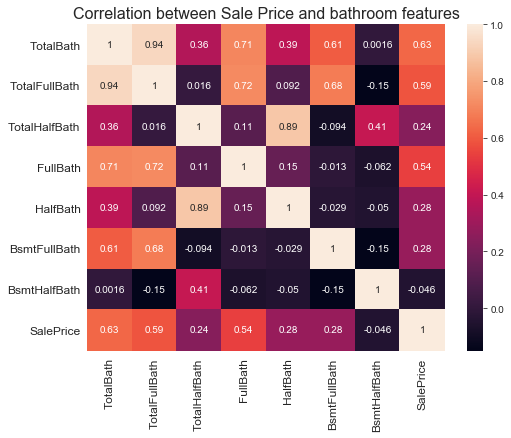

In [323]:
# Check correlation between SalePrice and bathroom columns
plt.figure(figsize=(8,6))
sns.heatmap(train[['TotalBath', 'TotalFullBath', 'TotalHalfBath', 'FullBath', 'HalfBath', 
                   'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']].corr(), annot=True)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.title('Correlation between Sale Price and bathroom features', fontsize=16);

As we can see, SalePrice has the highest correlation with TotalBath. Let's only retain TotalBath and drop all the individual bathroom columns.

In [324]:
train.drop(columns=['TotalFullBath', 'TotalHalfBath', 'FullBath', 'HalfBath', 
                   'BsmtFullBath', 'BsmtHalfBath'], inplace=True)

Observation 11: There are two outliers in LotArea and LotFrontage. These are houses with a huge area but low prices. It's best to drop them so that our model can generalise better.

In [325]:
train.drop(index=train[train.LotArea > 100_000].index, inplace=True)
train.drop(index=train[train.LotFrontage > 250].index, inplace=True)

### Let's view the scatterplots again¶

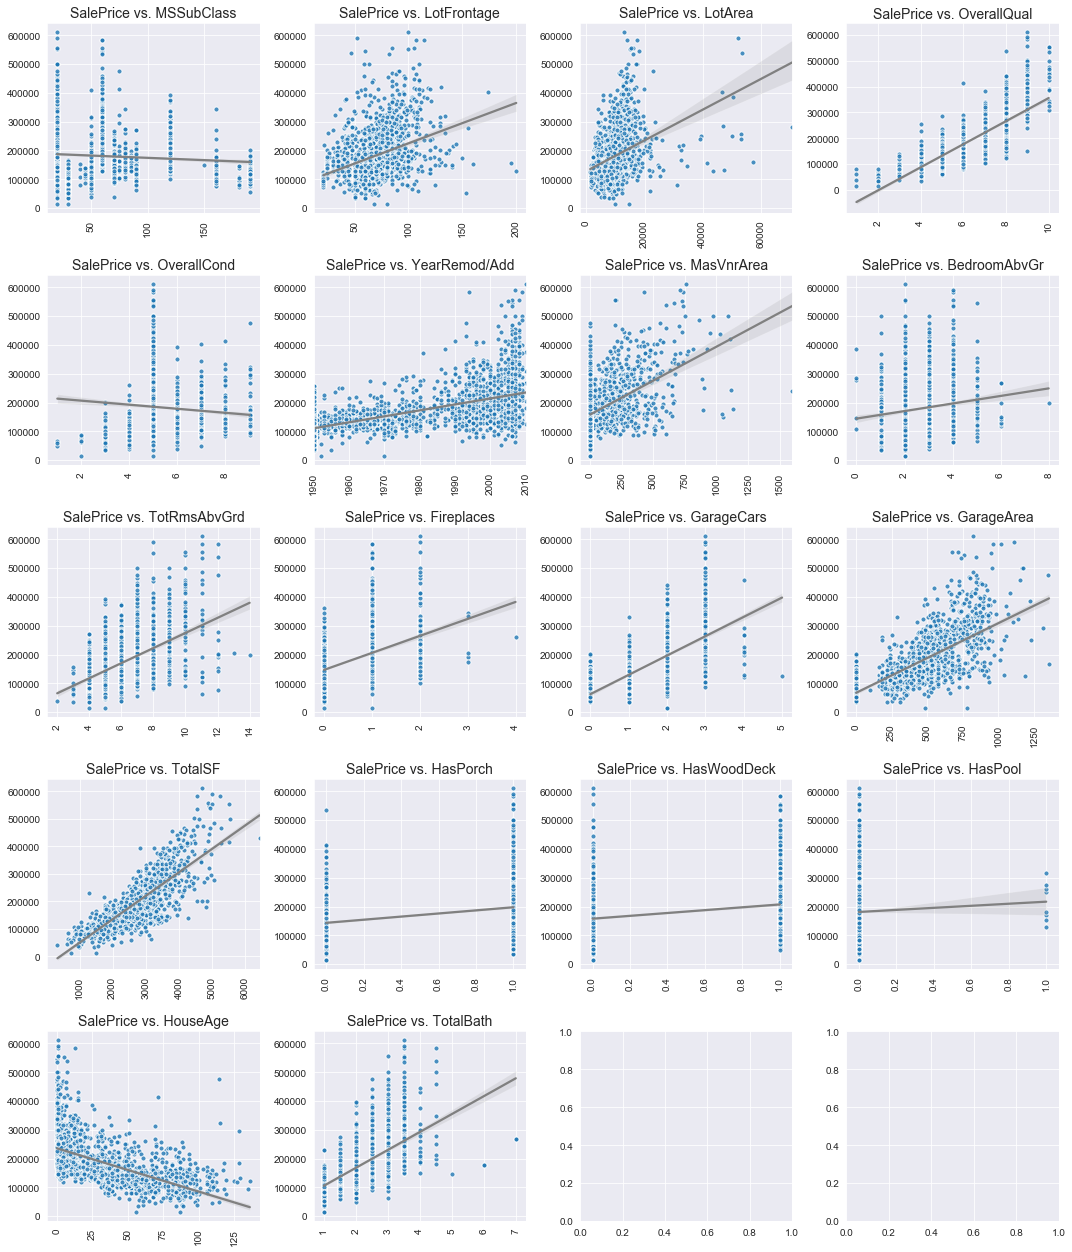

In [326]:
num_cols = train.select_dtypes(exclude='object').drop(columns=['Id', 'PID', 'SalePrice']).columns

nrows = int(np.ceil(len(num_cols)/4)) 
fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
ax = ax.ravel() 
for i, col in enumerate(num_cols): 
    sns.regplot(y=train['SalePrice'], x=train[col],ax=ax[i], \
                    scatter_kws={"s": 25, 'edgecolor':'white'},
                    line_kws = {'color':'grey'})
    ax[i].set_title(f'SalePrice vs. {col}',fontsize=14)  
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].set_xlabel(None, fontsize=14)
    ax[i].set_ylabel(None)
plt.tight_layout()

### Observation: 99.6% of HasPool is of a single value. Let's drop this column since it will not aid us much in predicting SalePrice.

In [327]:
# 99.6% of all houses in the dataset did not have a pool.
train.HasPool.value_counts(normalize=True)

0    0.99609
1    0.00391
Name: HasPool, dtype: float64

In [328]:
train.drop(columns='HasPool', inplace=True)

### Count plots of all categorical features¶

Categorical features with a high variance in values will better explain the variation in SalePrice.

From the plots below, we can see that some of the categorical features are dominated by a particular value (e.g. in Alley, and LandContour), with very little representation of the other categories.

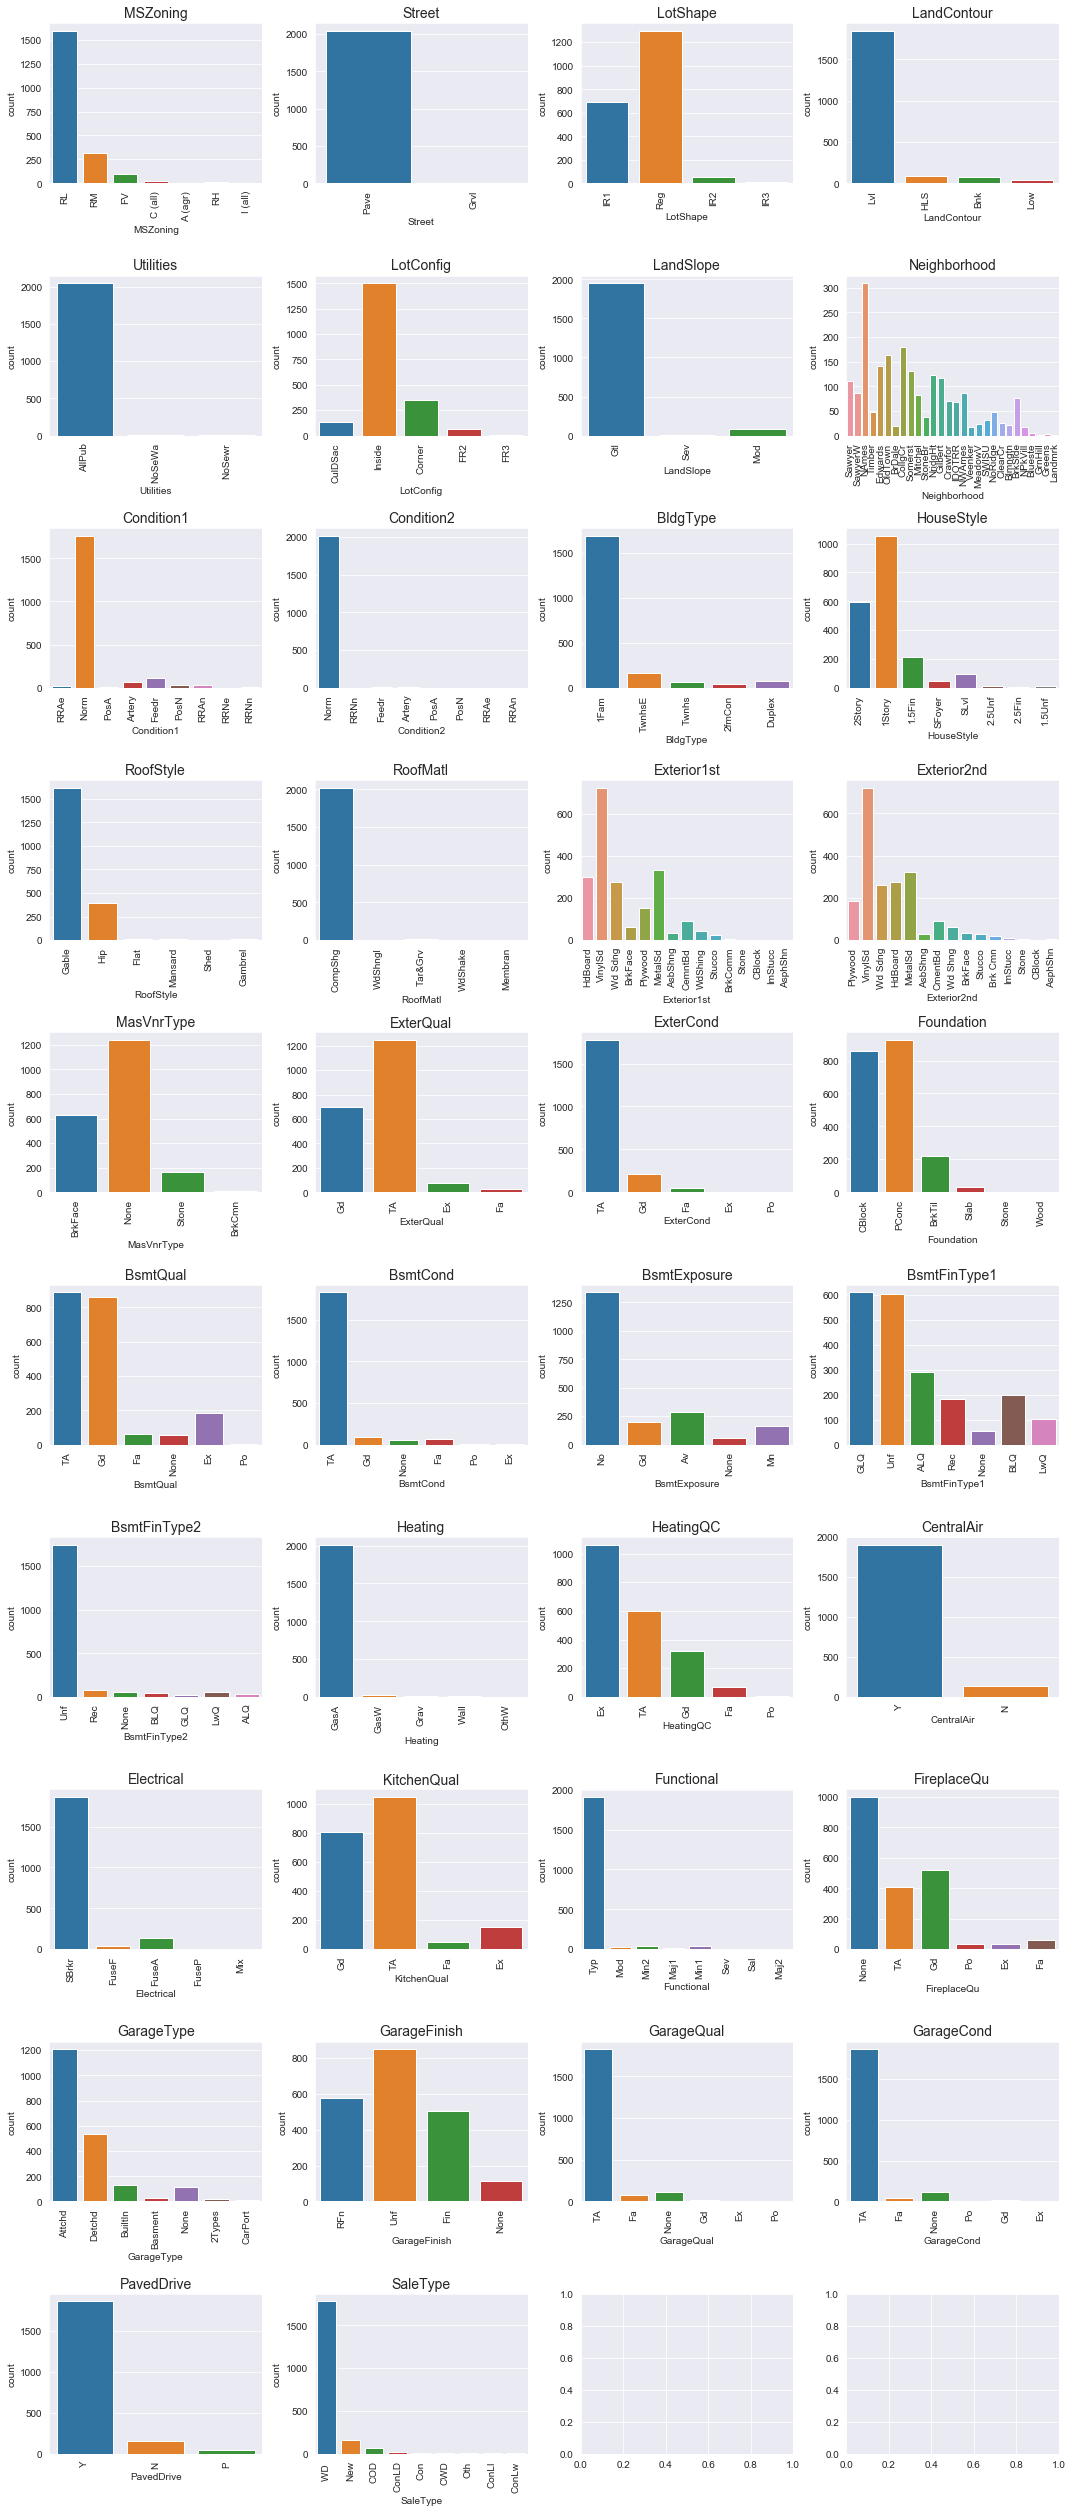

In [329]:

# create a list of a categorical features of 'object' datatype
cat_cols = train.select_dtypes(include='object').columns

# calculate number of rows needed given 4 columns
nrows = int(np.ceil(len(cat_cols)/4))

# create a figure
fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(15, nrows*3.5)) 

# flatten the axes into a 1D list
ax = ax.ravel() 

# loop through the categorical columns and plot a countplot for each
for i, col in enumerate(cat_cols): 
    sns.countplot(x=col,data=train, ax = ax[i])
    ax[i].set_title(f'{col}',fontsize=14)
    ax[i].tick_params(axis='x', rotation=90)
plt.tight_layout()

Observation: There are several columns that have majority of their values concentrated in a particular value. We could probably drop columns that have around 90% or more of their values in a particular value. Let's print their normalised value counts to identify which columns these are.


### Check the variance in the distribution of values amongst the categorical variables

We will drop variables with low variance, i.e. high concentration in a single value, as they will be less helpful in explaining variation in SalePrice.



In [330]:
for col in train.dtypes[train.dtypes == 'object'].index:
    print('---------------', col, '---------------')
    print(train[col].value_counts(normalize=True))
    print('\n')

--------------- MSZoning ---------------
RL         0.778592
RM         0.154448
FV         0.049365
C (all)    0.009286
RH         0.006843
A (agr)    0.000978
I (all)    0.000489
Name: MSZoning, dtype: float64


--------------- Street ---------------
Pave    0.996579
Grvl    0.003421
Name: Street, dtype: float64


--------------- LotShape ---------------
Reg    0.632942
IR1    0.337732
IR2    0.025415
IR3    0.003910
Name: LotShape, dtype: float64


--------------- LandContour ---------------
Lvl    0.900782
HLS    0.041056
Bnk    0.038123
Low    0.020039
Name: LandContour, dtype: float64


--------------- Utilities ---------------
AllPub    0.999022
NoSewr    0.000489
NoSeWa    0.000489
Name: Utilities, dtype: float64


--------------- LotConfig ---------------
Inside     0.733627
Corner     0.169599
CulDSac    0.063050
FR2        0.029326
FR3        0.004399
Name: LotConfig, dtype: float64


--------------- LandSlope ---------------
Gtl    0.953568
Mod    0.042522
Sev    0.003910
N


Observation: These columns have majority of their values in a single value so let's drop them.

Utilities (99.9%)
Street (99.7%)
RoofMatl (98.8%)
Condition2 (98.7%)
Heating (98.4%)
LandSlope (95.3%)
Functional (93.4%)
CentralAir (93.1%)
Electrical (91.1%)
GarageCond (91.1%)
PavedDrive (90.7%)
LandContour (90.1%)
BsmtCond (89.4%)

In [331]:
train.drop(columns=['Utilities', 'Street', 'RoofMatl', 'Condition2', 'Heating', 'LandSlope', 'Functional',
                    'CentralAir', 'Electrical', 'GarageCond', 'PavedDrive', 'LandContour', 'BsmtCond'], inplace=True)

### Boxplots of SalePrice against categorical features

The categorical features seem to have sufficient variance in relation to SalePrice. We will retain all of the columns for our regression modeling later.

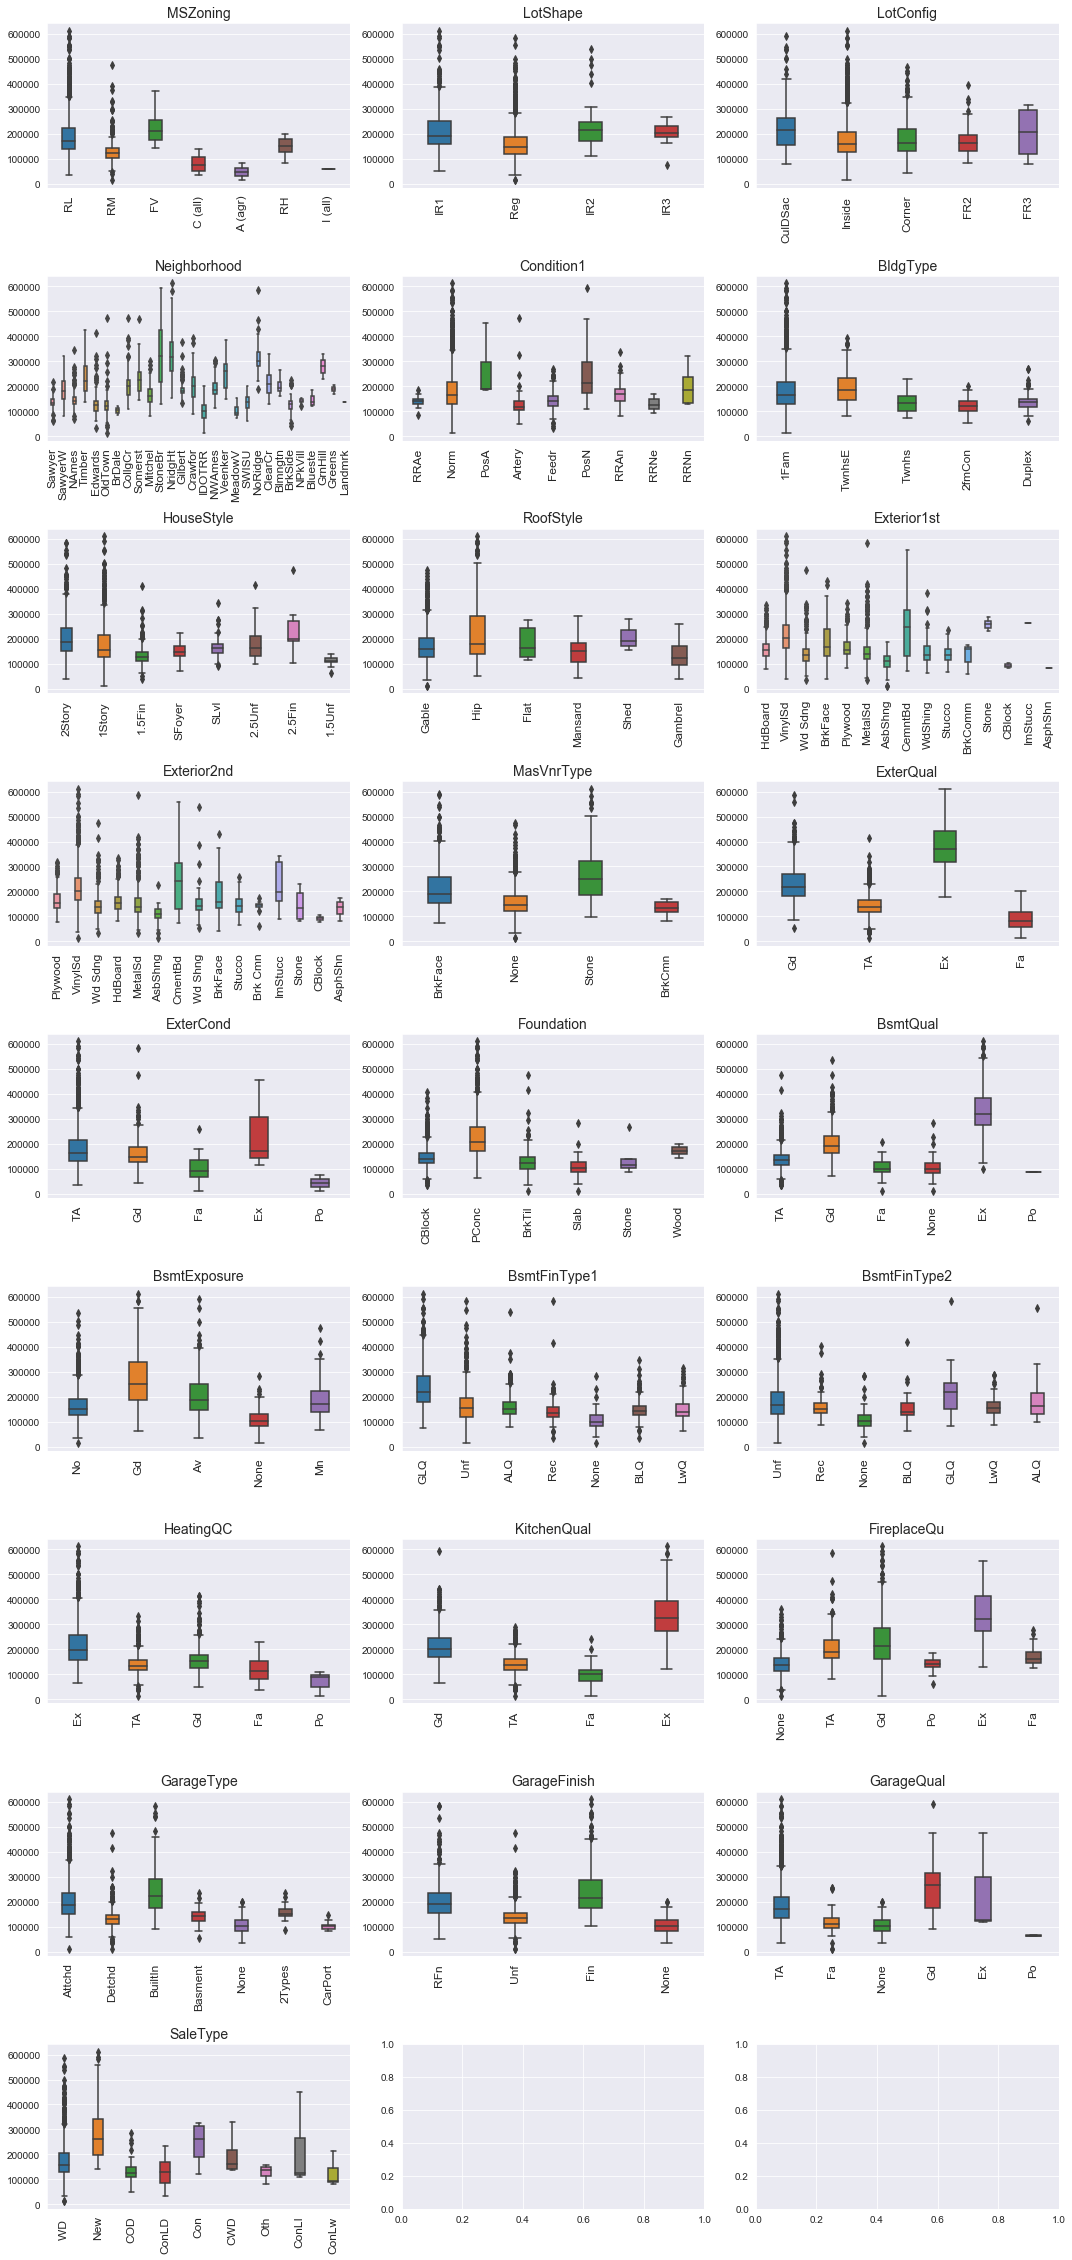

In [332]:
cat_cols = train.select_dtypes(include='object').columns
nrows = int(np.ceil(len(cat_cols)/3)) 
fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows*3.5)) 
ax = ax.ravel() 
for i, col in enumerate(cat_cols): 
    sns.boxplot(x = train[col], y = train['SalePrice'], width = 0.3, ax = ax[i])
    ax[i].set_title(col, fontsize=14)  
    ax[i].tick_params(axis='x', rotation=90, labelsize=12)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
plt.tight_layout()


### Encode Ordinal Features

In [333]:
val_map = {
    # ExterQual, #ExterCond, BsmtQual, HeatingQC, KitchenQual, GarageQual, FireplaceQu
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0, 
    # BsmtExposure 
    'Av': 3, 'Mn': 2, 'No': 1, 
    # BsmtFinType1, BsmtFinType2
    'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6, 
    # LotShape
    'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3 
}

In [334]:
# list of all ordinal columns to map integer values
col_list = ['ExterQual', 'ExterCond', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
            'GarageQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'LotShape']

# map the integer values
for col in col_list:
    train[col] = train[col].map(val_map)


### Drop highly correlated feature variables


Linear regression or multilinear regression requires independent variables to have little or no similar features.

Multicollinearity refers to the situation where there is a strong correlation between independent variables. When independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. Thus, it becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

To reduce multicollinearity, we will remove features that are highly correlated with one another. During the modelling process, we will also be utilising regularisation techniques like Ridge and Lasso regression which will help to reduce multicollinearity by adding penalty terms to the loss function of our regression model.

To start, we will use a heatmap to visualise all the correlations between our numerical featurevariables.

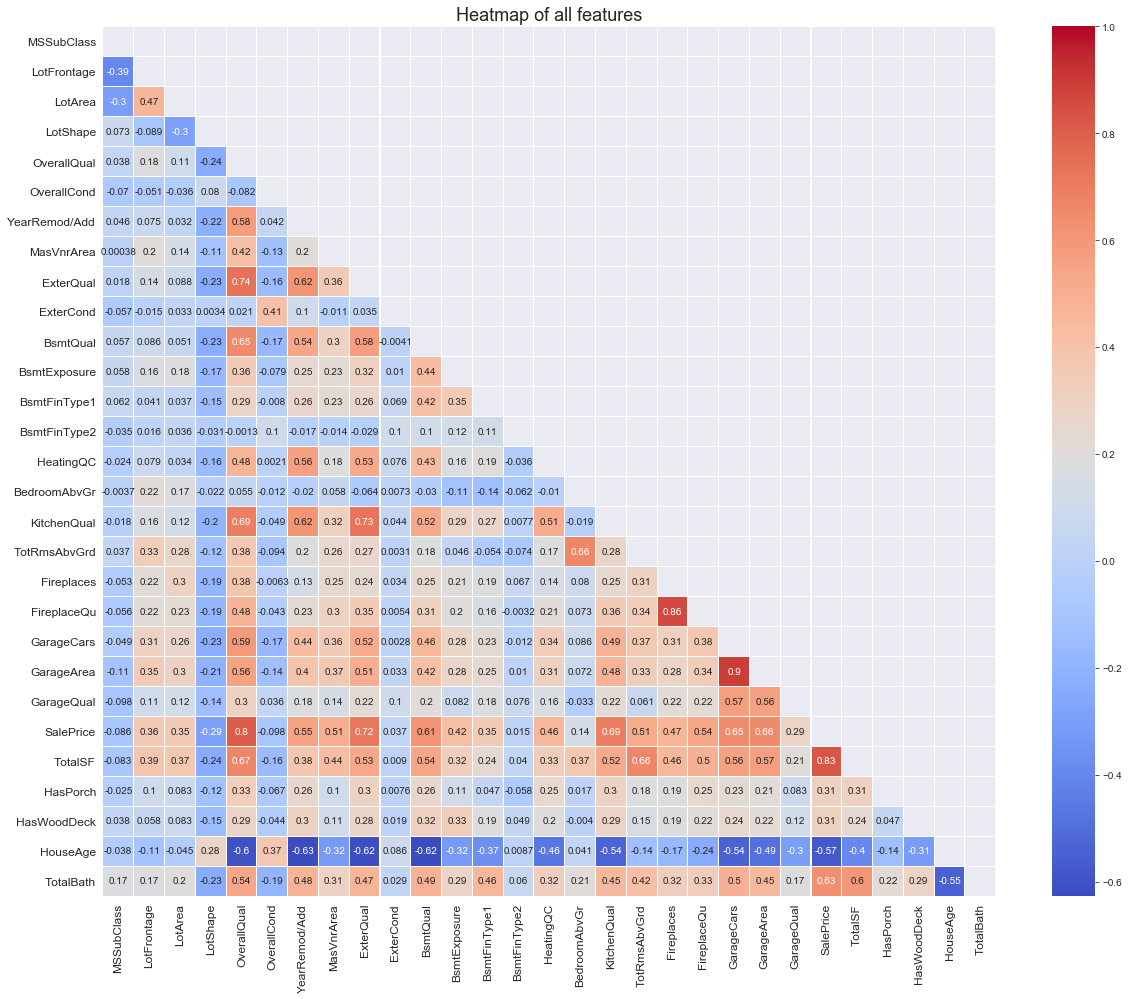

In [335]:
# create a zero matrix of the same size as the correlation matrix
custom_mask = np.zeros_like(train.drop(columns=['Id', 'PID']).corr()) 

# generate indices corresponding to the upper triangle of the matrix
upper_triangle_index = np.triu_indices_from(custom_mask) 

# set the upper triangle indices of the matrix to 1
custom_mask[upper_triangle_index] = True

fig, ax = plt.subplots(figsize = (20,16))
ax.tick_params(labelsize=12)
sns.heatmap(train.drop(columns=['Id', 'PID']).corr(), cmap='coolwarm', lw=0.1, linecolor='white', mask = custom_mask, annot=True)
plt.title('Heatmap of all features', fontsize=18);

### Observations:

GarageCars and GarageArea are highly correlated (0.9) with each other. Let's drop GarageCars (0.65) since it has a lower correlation to SalePrice than GarageArea (0.66).
FireplaceQu and Fireplaces are highly correlated (0.86) with each other. Even though Fireplaces (0.47) has a lower correlation with SalePrice than FireplaceQu (0.54), let's drop the FirePlaceQu since it had 48.8% missing values originally.
While there are probably still many features that are correlated with one another, we will make use of Lasso and Ridge regularization to help us reduce the effects of multicollinearity later on.

In [336]:
train.drop(columns=['GarageCars', 'FireplaceQu'], inplace=True)



### Log-transformation of target variable SalePrice
When doing regression, we almost always need to scale our feature/dependent variables so that they have a mean of 0 and standard deviation of 1. This helps to avoid the case where one or several features dominate others in magnitude, and as a result, the model hardly picks up the contribution of the smaller scale variables, even if they are strong.

It is typically not necessary to scale the target variable, however, in my case, I will do a log transformation to reduce the scale of values for SalePrice. This makes the model less sensitive to outliers because a log-transformation de-emphasises them (outliers are brought close in). This would in turn improve prediction accuracy.

Numpy's .log() method changes the range of the data into a natural logarithm.

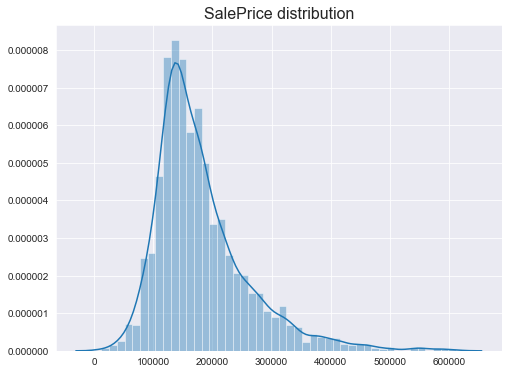

In [337]:
# plot distribution of SalePrice
plt.figure(figsize=(8,6))
sns.distplot(train["SalePrice"])
plt.title('SalePrice distribution', fontsize=16)
plt.xlabel(None);

Log transformation should only be done if the variable's distribution is right-skewed as log transforming a left-skewed variable will only increase its left-skewness. In our case, this condition holds.

In [338]:
# To make the distribution of SalePrice more normal, let's take do a log transformation.
train["SalePrice"] = np.log(train["SalePrice"])

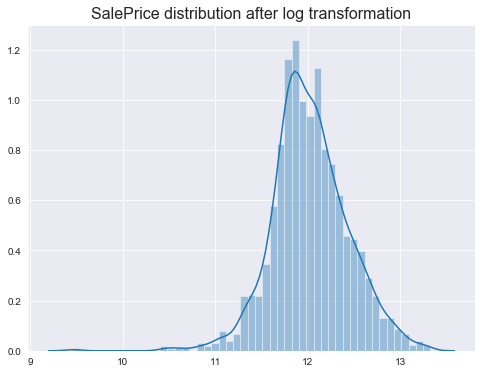

In [339]:

# View SalePrice's distribution again
plt.figure(figsize=(8,6))
sns.distplot(train["SalePrice"])
plt.title('SalePrice distribution after log transformation', fontsize=16)
plt.xlabel(None);

### Check dataset again

In [340]:
# select all numerical columns
train.select_dtypes(exclude='object')

,Id,PID,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearRemod/Add,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,GarageQual,SalePrice,TotalSF,HasPorch,HasWoodDeck,HouseAge,TotalBath
0,109,533352170,60,70.0,13517,2,6,8,2005,289.0,4,3,3,1,6,1,5,3,4,6,0,475.0,3,11.779129,2204.0,1,0,34,2.5
1,544,531379050,60,43.0,11492,2,7,5,1997,132.0,4,3,4,1,6,1,5,4,4,8,1,559.0,3,12.301383,3035.0,1,0,13,3.5
2,153,535304180,20,68.0,7922,3,5,7,2007,0.0,3,4,3,1,6,1,3,3,4,5,0,246.0,3,11.599103,2114.0,1,0,57,2.0
3,318,916386060,60,73.0,9802,3,5,5,2007,0.0,3,3,4,1,1,1,4,3,3,7,0,400.0,3,12.066811,1828.0,0,1,4,2.5
4,255,906425045,50,82.0,14235,2,6,8,1993,0.0,3,3,2,1,1,1,3,3,3,6,0,484.0,3,11.838626,2121.0,1,0,110,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,79.0,11449,2,8,5,2007,0.0,4,3,4,3,6,1,5,3,4,7,1,520.0,3,12.607366,3612.0,1,0,1,3.0
2047,785,905377130,30,63.0,12342,2,4,5,1950,0.0,3,3,3,1,4,1,5,1,3,4,0,539.0,3,11.320554,1722.0,0,1,69,1.0
2048,916,909253010,50,57.0,7558,3,6,6,1950,0.0,3,3,3,1,1,1,4,3,3,9,1,342.0,2,12.083905,2809.0,0,0,81,1.5
2049,639,535179160,20,80.0,10400,3,4,5,1956,0.0,3,3,3,1,3,2,3,3,3,6,2,294.0,3,11.877569,2400.0,1,0,53,2.0



Observation:

MSSubClass is of an integer datatype, but since it's actually a nominal variable, let's convert it to an object datatype so that we can create dummies for it.

In [341]:
# convert MSSubClass into an object datatype
train['MSSubClass'] = train['MSSubClass'].astype(str)

In [342]:
train.shape

(2046, 43)

In [343]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2050
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2046 non-null   int64  
 1   PID            2046 non-null   int64  
 2   MSSubClass     2046 non-null   object 
 3   MSZoning       2046 non-null   object 
 4   LotFrontage    2046 non-null   float64
 5   LotArea        2046 non-null   int64  
 6   LotShape       2046 non-null   int64  
 7   LotConfig      2046 non-null   object 
 8   Neighborhood   2046 non-null   object 
 9   Condition1     2046 non-null   object 
 10  BldgType       2046 non-null   object 
 11  HouseStyle     2046 non-null   object 
 12  OverallQual    2046 non-null   int64  
 13  OverallCond    2046 non-null   int64  
 14  YearRemod/Add  2046 non-null   int64  
 15  RoofStyle      2046 non-null   object 
 16  Exterior1st    2046 non-null   object 
 17  Exterior2nd    2046 non-null   object 
 18  MasVnrTy

In [344]:
# save a copy of the dataset w/o dummy variables
train_clean = train.copy()

In [345]:
# save the train_clean dataframe into a csv file
train_clean.to_csv('train_clean.csv', index=False)


### Perform one-hot encoding for all the nominal features¶

In [346]:
# perform one-hot encoding for all the 'object' dtype columns in the train dataframe
train_dummy = pd.get_dummies(train)

In [347]:
train_dummy.shape

(2046, 172)

In [348]:
# save the train_dummy dataframe into a csv file
train_dummy.to_csv('train_dummy.csv', index=False)

## Now let's repeat all the cleaning and processing steps for the test dataset


Create columns as per train dataset

In [349]:
test['TotalSF'] = test['GrLivArea'] + test['TotalBsmtSF']
test['HasWoodDeck'] = np.where((test['WoodDeckSF'] != 0), 1, 0)
test['HasPorch'] = np.where(test[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis=1) > 0, 1, 0)
test['HouseAge'] = test['YrSold'] - test['YearBuilt']
test['TotalBath'] = test['FullBath'] + test['BsmtFullBath'] + test['HalfBath']*0.5 + test['BsmtHalfBath']*0.5


Drop columns as per train dataset

In [350]:
test_cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'TotalBsmtSF', 'GrLivArea',
                     '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                     'GrLivArea', 'GarageYrBlt', 'MiscVal', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold', 'MoSold', 'YearBuilt', 
                     'KitchenAbvGr', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'Street', 
                     'Utilities', 'Heating',  'Condition2', 'RoofMatl', 'GarageCond', 'GarageCars',
                     'LandSlope', 'Functional', 'LandContour', 'Electrical', 'BsmtCond', 'PavedDrive', 
                     'CentralAir', 'FireplaceQu']

In [351]:
test.drop(columns=test_cols_to_drop, inplace=True)


Impute missing values

In [352]:
# check and see missing values again
count = test.isna().sum().sort_values(ascending=False)
pct = (test.isna().sum() / len(train)).sort_values(ascending=False)
null_values = pd.concat([count, pct], axis=1, keys=['count', 'percent'])
filtered = null_values[null_values['count'] > 0]
filtered

,count,percent
LotFrontage,160,0.078201
GarageQual,45,0.021994
GarageFinish,45,0.021994
GarageType,44,0.021505
BsmtFinType2,25,0.012219
BsmtQual,25,0.012219
BsmtExposure,25,0.012219
BsmtFinType1,25,0.012219
MasVnrType,1,0.000489
MasVnrArea,1,0.000489


Summary of missing values and actions to be taken


Feature	Type	Comment	Impute with?
LotFrontage	Numerical	This refers to 'linear feet of street connected to property'
and it is unlikely that a lot will have no street connection.
Hence no 0 values makes sense and we should not fill null values with 0.	Since the area of each street connected to the house property
most likely have a similar area to other houses in its neighborhood,
we can fill in missing values by the median LotFrontage of the neighborhood.

In [353]:
#fill columns with 0
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [354]:
# create a list of columns to fill NA values with None
fill_none_cols = ['GarageFinish', 'GarageQual', 'GarageType', 'BsmtExposure', 
                  'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'MasVnrType']

In [355]:
# fill columns with None
for col in fill_none_cols:
    test[col] = test[col].fillna('None')

In [356]:
# impute value for LotFrontage
test['LotFrontage'] = test['LotFrontage'].fillna(test.groupby('Neighborhood')['LotFrontage'].transform('median'))

In [357]:
# check and see if there are any missing values left
test.isna().sum()

Id               0
PID              0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemod/Add    0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageArea       0
GarageQual       0
SaleType         0
TotalSF          0
HasWoodDeck      0
HasPorch         0
HouseAge         0
TotalBath        0
dtype: int64

In [358]:
test_cols = test.columns.values

### Encode ordinal variables

In [359]:
val_map = {
    # ExterQual, #ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond,
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0, 
    # BsmtExposure 
    'Av': 3, 'Mn': 2, 'No': 1, 
    # BsmtFinType1, BsmtFinType2
    'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6, 
    # LotShape
    'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3 
}

In [360]:

col_list = ['ExterQual', 'ExterCond', 'BsmtQual', 'HeatingQC', 'KitchenQual',
            'GarageQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'LotShape']

for col in col_list:
    test[col] = test[col].map(val_map)

### Convert MSSubClass from Numerical datatype to String

In [361]:

test['MSSubClass'] = test['MSSubClass'].astype(str)

### Final check of test data

In [362]:

# check if we have the same columns in test and train_clean
diff = set(train_clean.columns).symmetric_difference(set(test.columns))
list(diff)

['SalePrice']

In [363]:
# create a copy of the test data
test_clean = test.copy()

In [364]:
test_clean.shape

(879, 42)

In [365]:
# save a copy of test_clean as a csv file
test_clean.to_csv('test_clean.csv', index=False)


### Create dummies for all nominal variables

In [366]:
test_dummy = pd.get_dummies(test)

In [367]:
test_dummy

,Id,PID,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearRemod/Add,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,GarageQual,TotalSF,HasWoodDeck,HasPorch,HouseAge,TotalBath,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD
0,2658,902301120,69.0,9142,3,6,8,1950,0.0,3,2,2,1,1,1,4,4,2,9,0,440.0,1,2948.0,0,1,96,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,75.0,9662,2,5,4,1977,0.0,3,3,4,1,1,1,3,6,3,10,0,580.0,3,3934.0,1,0,29,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,58.0,17104,2,7,5,2006,0.0,4,3,4,3,6,1,5,3,4,7,1,426.0,3,2150.0,1,1,0,3.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,60.0,8520,3,5,6,2006,0.0,4,3,3,1,1,1,3,2,3,5,0,480.0,2,1936.0,0,1,84,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [368]:
# save a copy to csv
test_dummy.to_csv('test_dummy.csv', index=False)


Now that our data preparation is complete, we can proceed on to the modelling process in my second Jupyter Notebook.


## Project 2: Predicting sale prices of houses in Ames, Iowa

Part 1 of 2: Data cleaning, EDA, and preprocessing

Part 2 of 2: Modelling, feature selection, and prediction (current)

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.dummy import DummyRegressor

In [370]:
# set option to display all the columns available
pd.set_option("display.max_columns", None)

In [371]:
# import the clean datasets created in the first Jupyter Notebook
test_dummy = pd.read_csv('test_dummy.csv')
train_dummy = pd.read_csv('train_dummy.csv')

In [372]:
test_dummy.shape

(879, 168)

In [373]:
train_dummy.shape

(2046, 172)


### Modelling


Three different models were tested using cross validation on training data:

ordinary linear regression
ridge regression
lasso regression

Before training my models, I will do a scaling of our feature variables so that they have a mean of 0 and standard deviation of 1. This helps to avoid the case where one or several features dominate others in magnitude, and as a result, the model hardly picks up the contribution of the smaller scale variables, even if they are strong.


### Set up helper functions for Linear Regression, Lasso, Ridge

In [374]:

def linear_reg(X_train, X_test, y_train, y_test):
    lr = LinearRegression()   
    lr.fit(X_train, y_train)
    y_train_pred = np.exp(lr.predict(X_train))
    y_test_pred = np.exp(lr.predict(X_test))
    
    training_R2 = lr.score(X_train, y_train) 
    training_RMSE = np.sqrt(mean_squared_error(np.exp(y_train), y_train_pred))
    
    testing_R2 = lr.score(X_test, y_test) 
    testing_RMSE = np.sqrt(mean_squared_error(np.exp(y_test), y_test_pred))
      
    # k-fold cross validation score
    mean_rmse_cv = np.sqrt(np.abs(cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()))
    mean_r2_cv = cross_val_score(lr, X_train, y_train, cv=10).mean()
    
    print('---------- LINEAR REGRESSION -----------')
    print('')
    print(f'Training R2 score: {training_R2:.5f}')
    print(f'Validation R2 score: {testing_R2:.5f}')
    print(f'Cross validation mean R2: {mean_rmse_cv:.5f}')
    print('')
    print(f'Training RMSE: {training_RMSE:.5f}')
    print(f'Validation RMSE: {testing_RMSE:.5f}')
    print(f'Cross validation mean RMSE (logspace): {mean_rmse_cv:.5f}')  
    print('----------------------------------------')    
        
    # plot predictions
    f = plt.figure(figsize=(15,6))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.scatter(y_train_pred, np.exp(y_train), c='limegreen', s=10, marker = "s", label="Training data")
    ax1.scatter(y_test_pred, np.exp(y_test), c='white', s=12, marker = "s", edgecolor='midnightblue', linewidths=1, label='Validation data')   
    ax1.set_title('Actual vs. Predicted Values', fontsize=16)
    ax1.set_xlabel('Predicted values', fontsize=15)
    ax1.set_ylabel('Actual values', fontsize=15)
    ax1.legend(loc = 0)
    ax1.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], c='red')
    
    # plot residuals
    ax2.scatter(y_train_pred, y_train_pred - np.exp(y_train), c='limegreen', s=10, marker = "s", label="Training data")
    ax2.scatter(y_test_pred, y_test_pred - np.exp(y_test), c='white', s=12, marker = "s", edgecolor='midnightblue', linewidths=1, label='Validation data')
    ax2.set_title("Residuals", fontsize=16)
    ax2.set_xlabel("Predicted values", fontsize=15)
    ax2.set_ylabel("Residuals", fontsize=15)
    ax2.legend(loc=0)
    ax2.hlines(y=0, xmin = np.exp(y_test).min(), xmax = np.exp(y_test).max(), color = "blue")
    
    # Coefficients
#     coef_dict = pd.DataFrame({'feature': X.columns,
#                  'coefficient': lr.coef_})    
#     print(coef_dict.sort_values('coefficient', ascending=False))

In [375]:
def ridge_reg(X_train, X_test, y_train, y_test):
    r_alphas = np.logspace(0, 5, 200)
    rr = RidgeCV(alphas=r_alphas, cv=5)
    rr.fit(X_train, y_train)
    
    optimal_alpha = rr.alpha_    
    
    # take optimal alpha from CV search and create a new model with the optimal alpha and fit on the
    # entire train dataset
    optimal_ridge = Ridge(alpha=optimal_alpha, random_state=42)
    
    optimal_ridge.fit(X_train,y_train)
    y_test_pred = np.exp(optimal_ridge.predict(X_test))
    y_train_pred = np.exp(optimal_ridge.predict(X_train))

    training_R2 = optimal_ridge.score(X_train, y_train) 
    training_RMSE = np.sqrt(mean_squared_error(np.exp(y_train), y_train_pred))

    testing_R2 = optimal_ridge.score(X_test, y_test)
    testing_RMSE = np.sqrt(mean_squared_error(np.exp(y_test), y_test_pred))
    
    optimal_ridge_mean_R2 = cross_val_score(optimal_ridge, X_train, y_train, cv=5).mean() # R2
    optimal_ridge_cv_mean_rmse = np.sqrt(np.abs((-cross_val_score(optimal_ridge, X_train, y_train, cv=5, 
                                                  scoring='neg_mean_squared_error')).mean()))
 
    print('---------- RIDGE REGRESSION ----------')
    print('')
    print(f'Optimal alpha: {optimal_alpha:.10f}')
    print('')
    print(f'Training R2 score: {training_R2:.5f}')
    print(f'Validation R2 score: {testing_R2:.5f}')
    print(f'Cross validation mean R2: {optimal_ridge_mean_R2:.5f}')
    print('')
    print(f'Training RMSE: {training_RMSE:.5f}')
    print(f'Validation RMSE: {testing_RMSE:.5f}')
    print(f'Cross validation mean RMSE (logspace): {optimal_ridge_cv_mean_rmse:.5f}') 
    print('--------------------------------------')
   # plot predictions
    f = plt.figure(figsize=(15,6))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.scatter(y_train_pred, np.exp(y_train), c='limegreen', s=10, marker = "s", label="Training data")
    ax1.scatter(y_test_pred, np.exp(y_test), c='white', s=12, marker = "s", edgecolor='midnightblue', linewidths=1, label='Validation data')   
    ax1.set_title('Actual vs. Predicted Values', fontsize=16)
    ax1.set_xlabel('Predicted values', fontsize=15)
    ax1.set_ylabel('Actual values', fontsize=15)
    ax1.legend(loc = 0)
    ax1.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], c='red')
    
    # plot residuals
    ax2.scatter(y_train_pred, y_train_pred - np.exp(y_train), c='limegreen', s=10, marker = "s", label="Training data")
    ax2.scatter(y_test_pred, y_test_pred - np.exp(y_test), c='white', s=12, marker = "s", edgecolor='midnightblue', linewidths=1, label='Validation data')
    ax2.set_title("Residuals", fontsize=16)
    ax2.set_xlabel("Predicted values", fontsize=15)
    ax2.set_ylabel("Residuals", fontsize=15)
    ax2.legend(loc=0)
    ax2.hlines(y=0, xmin = np.exp(y_test).min(), xmax = np.exp(y_test).max(), color = "blue")
    
    # Coefficients
    coef_dict = pd.DataFrame({'feature': X.columns,
                 'ridge_coef': optimal_ridge.coef_,
                 'abs_ridge_coef': np.abs(optimal_ridge.coef_)}).sort_values('abs_ridge_coef', ascending=False)    
    return coef_dict

In [376]:

def lasso_reg(X_train, X_test, y_train, y_test):
    lasso_model = LassoCV(n_alphas=100, cv=5, random_state=42)   
    lasso_model.fit(X_train, y_train)
    
    optimal_alpha = lasso_model.alpha_
    
    optimal_lasso = Lasso(alpha=optimal_alpha, max_iter=10_000, random_state=42)
    optimal_lasso.fit(X_train, y_train)
    y_test_pred = np.exp(optimal_lasso.predict(X_test))
    y_train_pred = np.exp(optimal_lasso.predict(X_train))
    
    training_R2 = optimal_lasso.score(X_train, y_train) 
    training_RMSE = np.sqrt(mean_squared_error(np.exp(y_train), y_train_pred))
    
    testing_R2 = optimal_lasso.score(X_test, y_test)
    testing_RMSE = np.sqrt(mean_squared_error(np.exp(y_test), y_test_pred))
    
    optimal_lasso_mean_R2 = cross_val_score(optimal_lasso, X_train, y_train, cv=5).mean() # R2
    optimal_lasso_cv_mean_mse = np.abs((-cross_val_score(optimal_lasso, X_train, y_train, cv=5, 
                                                  scoring='neg_mean_squared_error')).mean())
    
    print('---------- LASSO REGRESSION ----------')
    print('')
    print(f'Optimal alpha: {optimal_alpha:.10f}')
    print('')
    print(f'Training R2 score: {training_R2:.5f}')
    print(f'Validation R2 score: {testing_R2:.5f}')
    print(f'Cross validation mean R2: {optimal_lasso_mean_R2:.5f}')
    print('')
    print(f'Training RMSE: {training_RMSE:.5f}')
    print(f'Validation RMSE: {testing_RMSE:.5f}')
    print(f'Cross validation mean RMSE (logspace): {optimal_lasso_cv_mean_mse:.5f}')   
    print('--------------------------------------')
    
    # plot predictions
    f = plt.figure(figsize=(15,6))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.scatter(y_train_pred, np.exp(y_train), c='limegreen', s=10, marker = "s", label="Training data")
    ax1.scatter(y_test_pred, np.exp(y_test), c='white', s=12, marker = "s", edgecolor='midnightblue', linewidths=1, label='Validation data')   
    ax1.set_title('Actual vs. Predicted Values', fontsize=16)
    ax1.set_xlabel('Predicted values', fontsize=15)
    ax1.set_ylabel('Actual values', fontsize=15)
    ax1.legend(loc = 0)
    ax1.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], c='red')
    
    # plot residuals
    ax2.scatter(y_train_pred, y_train_pred - np.exp(y_train), c='limegreen', s=10, marker = "s", label="Training data")
    ax2.scatter(y_test_pred, y_test_pred - np.exp(y_test), c='white', s=12, marker = "s", edgecolor='midnightblue', linewidths=1, label='Validation data')
    ax2.set_title("Residuals", fontsize=16)
    ax2.set_xlabel("Predicted values", fontsize=15)
    ax2.set_ylabel("Residuals", fontsize=15)
    ax2.legend(loc=0)
    ax2.hlines(y=0, xmin = np.exp(y_test).min(), xmax = np.exp(y_test).max(), color = "blue")
    
    # Coefficients
    coef_dict = pd.DataFrame({'feature': X.columns,
                 'lasso_coef': optimal_lasso.coef_,
                 'abs_lasso_coef': np.abs(optimal_lasso.coef_)}).sort_values('abs_lasso_coef', ascending=False)    
    return coef_dict

### Establish baseline score

For my baseline model, I will use sklearn's DummyRegressor() to create a dummy regression that always predicts the mean value of the target variable.

In [377]:
X = train_dummy.drop(columns=['Id', 'PID', 'SalePrice'])
y = train_dummy['SalePrice']

# make test and training split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create a dummy regressor
dummy_reg = DummyRegressor(strategy='mean')

# scale X data
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# "train" dummy regressor
dummy_reg.fit(X_train_scaled, y_train)

# score dummy regressor
dummy_reg.score(X_test_scaled, y_test)

-0.0012091701849696879

Our baseline model's R2 is close to 0, which indicates that the model explains none of the variability of SalePrice around its mean.


### Model evaluation


### Round 1: Using all 169 feature variables with Ridge, Lasso, and ElasticNet¶
I will not be fitting all 169 features into a Linear Regression model as severe overfitting will occur. We will first utilise regularisation techniques that will help to reduce overfitting by adding penalty terms.

### Set up X and y

In [378]:
X = train_dummy.drop(columns=['Id', 'PID', 'SalePrice'])
y = train_dummy['SalePrice']

X.shape

(2046, 169)


### Split our data into training and testing sets

In [379]:
# I've picked a test size of 33% because I want to have enough data in the test set to meaningfully evaluate my model.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# scale X data
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

---------- RIDGE REGRESSION ----------

Optimal alpha: 230.0430119773

Training R2 score: 0.92679
Validation R2 score: 0.90363
Cross validation mean R2: 0.88767

Training RMSE: 19813.58767
Validation RMSE: 21514.40080
Cross validation mean RMSE (logspace): 0.14105
--------------------------------------


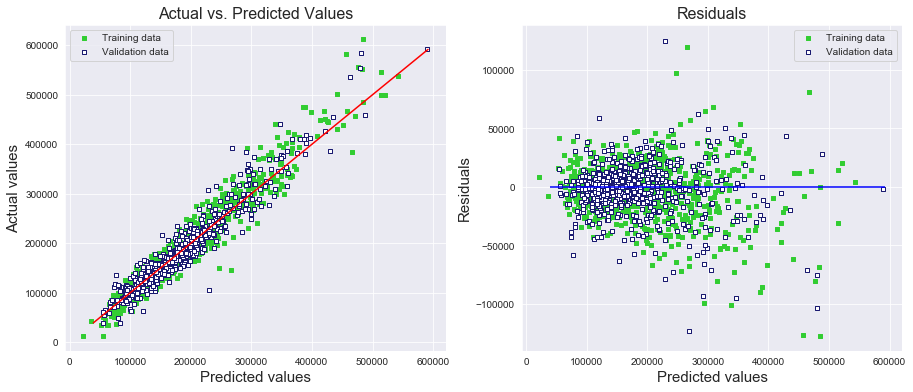

In [380]:
ridge1_coef = ridge_reg(X_train_scaled, X_test_scaled, y_train, y_test)

---------- LASSO REGRESSION ----------

Optimal alpha: 0.0045335077

Training R2 score: 0.92446
Validation R2 score: 0.89916
Cross validation mean R2: 0.89173

Training RMSE: 20303.43149
Validation RMSE: 22707.91700
Cross validation mean RMSE (logspace): 0.01933
--------------------------------------


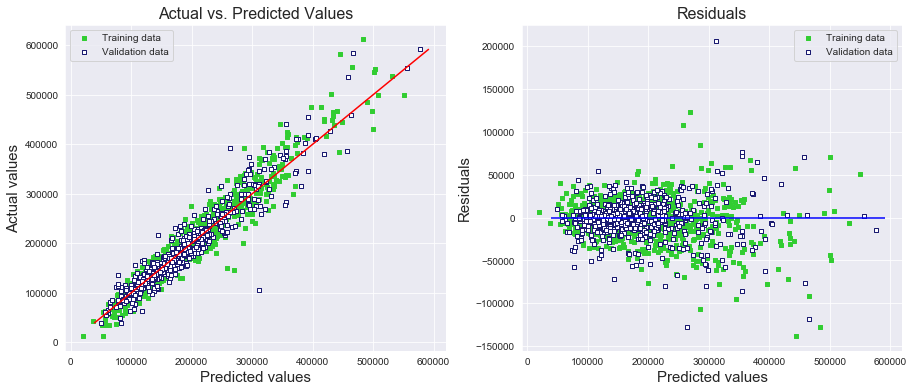

In [381]:
lasso1_coef = lasso_reg(X_train_scaled, X_test_scaled, y_train, y_test)

In [382]:
# see all predictors with coefficients that were zero-ed out by Lasso
lasso1_coef[lasso1_coef['lasso_coef'] == 0]

,feature,lasso_coef,abs_lasso_coef
120,Exterior1st_Stucco,0.0,0.0
154,GarageType_Detchd,-0.0,0.0
147,Foundation_Stone,0.0,0.0
125,Exterior2nd_AsphShn,0.0,0.0
164,SaleType_ConLI,-0.0,0.0
...,...,...,...
74,Neighborhood_SWISU,-0.0,0.0
69,Neighborhood_NPkVill,-0.0,0.0
68,Neighborhood_NAmes,-0.0,0.0
67,Neighborhood_Mitchel,0.0,0.0


In [383]:
# number of columns Lasso has helped to eliminate out of the original 169 columns
len(lasso1_dropped)

103

top30_lasso
Index(['TotalSF', 'OverallQual', 'OverallCond', 'HouseAge', 'MSZoning_A (agr)',
       'TotalBath', 'Exterior1st_CBlock', 'MSSubClass_30', 'LotArea',
       'Fireplaces', 'BsmtFinType1', 'GarageQual', 'MSZoning_C (all)',
       'KitchenQual', 'BldgType_1Fam', 'ExterQual', 'Neighborhood_Crawfor',
       'Exterior2nd_AsbShng', 'BsmtExposure', 'Foundation_PConc', 'HeatingQC',
       'Neighborhood_NridgHt', 'GarageArea', 'MSZoning_RM', 'TotRmsAbvGrd',
       'SaleType_New', 'Neighborhood_GrnHill', 'YearRemod/Add', 'HasPorch',
       'LotFrontage'],
      dtype='object')

Test on testing data with lasso model
Set up X and y


1. An automated feature selection method called Recursive Feature Elimination (RFE)

RFE allows us to specify the number of predictors that we want it to return. In our case, I will pass in the list of retained predictors from ElasticNet in Round 1 specify the number of features to be returned to be 30.

RFE works by ranking all the features it is trained with in order of importance.

How RFE works (Source: sklearn documentation)

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

2. Select the top 30 predictors with the highest absolute coefficients

Based on the coefficients that ElasticNet produced, we will select the 30 predictors with the highest absolute coefficients.

The results from these two approaches will be compared and we will select the set of predictors that produces the best results. We will also run an OLS linear regression model with the finalised set of predictors to see how it performs. If Linear Regression performs better than Elastic Net regression, we will use it as our production model instead.

Finally, we will use the production model on our test dataset to obtain SalePrice predictions.

In [384]:

def elastic_net(X_train, X_test, y_train, y_test):
    enet_model = ElasticNetCV(n_alphas=100, l1_ratio=np.linspace(0.01, 1.0, 25), cv=5, random_state=42)
    enet_model = enet_model.fit(X_train, y_train)

    optimal_alpha = enet_model.alpha_
    optimal_l1ratio = enet_model.l1_ratio_
    # If l1_ratio = 1, the penalty would be L1 penalty. If l1_ratio = 0, the penalty would be an L2 penalty. 
    # If the value of l1 ratio is between 0 and 1, the penalty would be the combination of L1 and L2.
      
    optimal_enet = ElasticNet(alpha = optimal_alpha, l1_ratio = optimal_l1ratio, max_iter=10_000)
    optimal_enet.fit(X_train, y_train)
    
    # generate predictions for both test and train data
    y_test_pred = np.exp(optimal_enet.predict(X_test))
    y_train_pred = np.exp(optimal_enet.predict(X_train))
    
    training_R2 = optimal_enet.score(X_train, y_train) 
    training_RMSE = np.sqrt(mean_squared_error(np.exp(y_train), y_train_pred))
    
    # evaluate the model using validation data
    testing_R2 = optimal_enet.score(X_test, y_test)
    testing_RMSE = np.sqrt(mean_squared_error(np.exp(y_test), y_test_pred))
    
    optimal_enet_mean_R2 = cross_val_score(optimal_enet, X_train, y_train, cv=5).mean() # R2
    optimal_enet_cv_mean_mse = np.sqrt(np.abs((-cross_val_score(optimal_enet, X_train, y_train, cv=5, 
                                                  scoring='neg_mean_squared_error')).mean()))

    print('------------ ELASTIC NET ------------')
    print('')
    print(f'Optimal alpha: {optimal_alpha:.10f}')
    print(f'Optimal L1 ratio: {optimal_l1ratio:.5f}')
    print('')
    print(f'Training R2 score: {training_R2:.5f}')
    print(f'Validation R2 score: {testing_R2:.5f}')
    print(f'Cross validation mean R2: {optimal_enet_mean_R2:.5f}')
    print('')
    print(f'Training RMSE: {training_RMSE:.5f}')
    print(f'Validation RMSE: {testing_RMSE:.5f}')
    print(f'Cross validation mean RMSE (logspace): {optimal_enet_cv_mean_mse:.5f}')
    print('--------------------------------------')
    
    # plot predictions
    f = plt.figure(figsize=(15,6))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.scatter(y_train_pred, np.exp(y_train), c='limegreen', s=10, marker = "s", label="Training data")
    ax1.scatter(y_test_pred, np.exp(y_test), c='white', s=12, marker = "s", edgecolor='midnightblue', linewidths=1, label='Validation data')   
    ax1.set_title('Actual vs. Predicted Values', fontsize=16)
    ax1.set_xlabel('Predicted values', fontsize=15)
    ax1.set_ylabel('Actual values', fontsize=15)
    ax1.legend(loc = 0)
    ax1.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], c='red')
    
    # plot residuals
    ax2.scatter(y_train_pred, y_train_pred - np.exp(y_train), c='limegreen', s=10, marker = "s", label="Training data")
    ax2.scatter(y_test_pred, y_test_pred - np.exp(y_test), c='white', s=12, marker = "s", edgecolor='midnightblue', linewidths=1, label='Validation data')
    ax2.set_title("Residuals", fontsize=16)
    ax2.set_xlabel("Predicted values", fontsize=15)
    ax2.set_ylabel("Residuals", fontsize=15)
    ax2.legend(loc=0)
    ax2.hlines(y=0, xmin = np.exp(y_test).min(), xmax = np.exp(y_test).max(), color = "blue")
    
    # Coefficients
    coef_dict = pd.DataFrame({'feature': X.columns,
                 'enet_coef': optimal_enet.coef_,
                 'abs_enet_coef': np.abs(optimal_enet.coef_)}).sort_values('abs_enet_coef', ascending=False)    
    return coef_dict


------------ ELASTIC NET ------------

Optimal alpha: 0.0884586869
Optimal L1 ratio: 0.05125

Training R2 score: 0.92148
Validation R2 score: 0.90697
Cross validation mean R2: 0.89290

Training RMSE: 20505.28505
Validation RMSE: 21439.28554
Cross validation mean RMSE (logspace): 0.13819
--------------------------------------


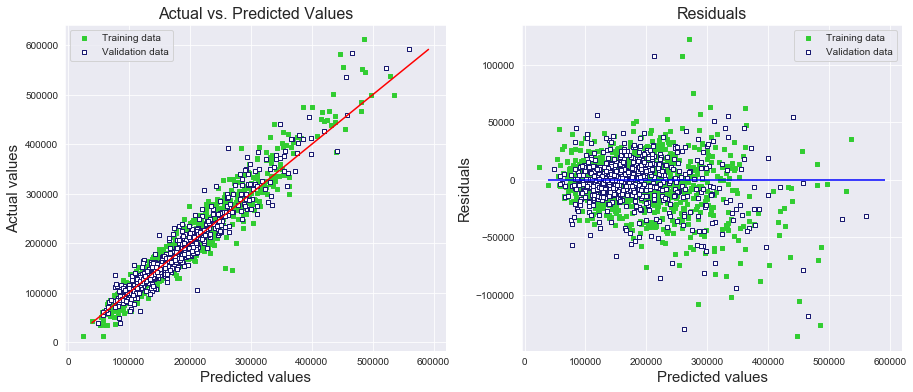

In [385]:
enet1_coef = elastic_net(X_train_scaled, X_test_scaled, y_train, y_test)

## Round 2a: Use the top 30 predictors from ElasticNet regression in Round 1


In [386]:
top30_enet1 = enet1_coef['feature'].head(30).tolist()

In [387]:
# create new X and y
X = train_dummy[top30_enet1]
y = train_dummy['SalePrice']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# scale X data
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

------------ ELASTIC NET ------------

Optimal alpha: 0.0849496572
Optimal L1 ratio: 0.01000

Training R2 score: 0.91430
Validation R2 score: 0.88923
Cross validation mean R2: 0.89197

Training RMSE: 22186.02455
Validation RMSE: 23920.89985
Cross validation mean RMSE (logspace): 0.13843
--------------------------------------


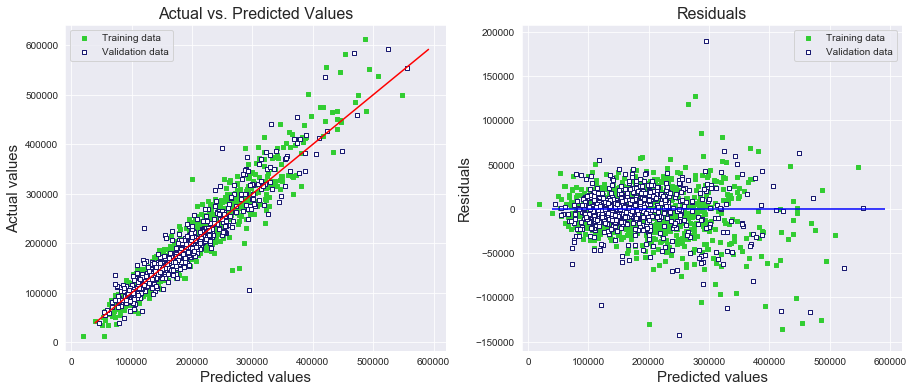

In [388]:
enet2_coef = elastic_net(X_train_scaled, X_test_scaled, y_train, y_test)

In [389]:
# predictors that were dropped by ElasticNet
enet1_dropped = enet1_coef[enet1_coef['enet_coef'] == 0]['feature'].tolist()

### Round 2b: Top 30 features via Recursive Feature Elimination (ElasticNet)
Obtain the top 30 features from RFE (using ElasticNet as estimator)

In [430]:
# Remove the columns dropped by ENet regression in Round 1
X = train_dummy.drop(columns=['Id', 'PID', 'SalePrice'] + enet1_dropped)
y = train_dummy['SalePrice']

ss = StandardScaler()
ss.fit(X)

X_scaled = ss.transform(X)

enet_model = ElasticNetCV(n_alphas=100, l1_ratio=np.linspace(0.01, 1.0, 30), cv=5, random_state=42)
rfe_enet = RFE(estimator=enet_model, step=1, n_features_to_select=30)
rfe_enet.fit(X_scaled,y)

RFE(estimator=ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001,
                           fit_intercept=True,
                           l1_ratio=array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ]),
                           max_iter=1000, n_alphas=100, n_jobs=None,
                           normalize=False, positive=False, precompute='auto',
                           random_state=42, selection='cyclic', tol=0.0001,
                           verbose=0),
    n_features_to_select=30, step=1, verbose=0)

In [431]:
# list of the top 30 features selected by RFE
top30_enet_rfe = X.loc[:, rfe_enet.support_].columns

In [432]:
top30_enet_rfe

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearRemod/Add', 'MasVnrArea',
       'ExterQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'GarageQual', 'TotalSF',
       'HouseAge', 'TotalBath', 'MSSubClass_160', 'MSSubClass_30',
       'MSZoning_A (agr)', 'MSZoning_C (all)', 'Neighborhood_Crawfor',
       'Neighborhood_GrnHill', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'BldgType_1Fam', 'Exterior1st_AsbShng',
       'Exterior1st_BrkFace', 'Foundation_PConc'],
      dtype='object')

In [433]:
# save the top 30features and their coefficients into a dataframe
df_coef_enet = pd.DataFrame({'feature': top30_enet_rfe,
              'coefficient': np.transpose(rfe_enet.estimator_.coef_),
              'abs_coefficient': np.abs(np.transpose(rfe_enet.estimator_.coef_))}).sort_values('abs_coefficient', ascending=False)

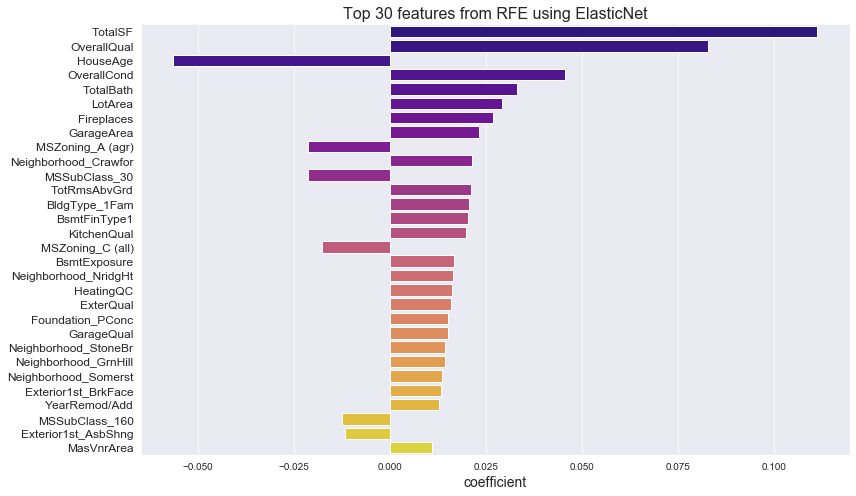

In [435]:

# plot the predictors from RFE with ENet
plt.figure(figsize=(12,7))
sns.barplot(data=df_coef_enet, x='coefficient', y='feature', palette="plasma")
plt.title('Top 30 features from RFE using ElasticNet', fontsize=16)
plt.xlabel('coefficient', fontsize=14)
plt.ylabel(None)
plt.yticks(fontsize=12)
plt.tight_layout()


### Run the ElasticNet model using top 30 features from RFE with ElasticNet as estimator

In [436]:
# create X and y with the top 25 features from RFE
X = train_dummy[top30_enet_rfe]
y = train_dummy['SalePrice']

In [437]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

------------ ELASTIC NET ------------

Optimal alpha: 0.1047299079
Optimal L1 ratio: 0.01000

Training R2 score: 0.91268
Validation R2 score: 0.90929
Cross validation mean R2: 0.89329

Training RMSE: 21223.97298
Validation RMSE: 20925.48973
Cross validation mean RMSE (logspace): 0.13766
--------------------------------------


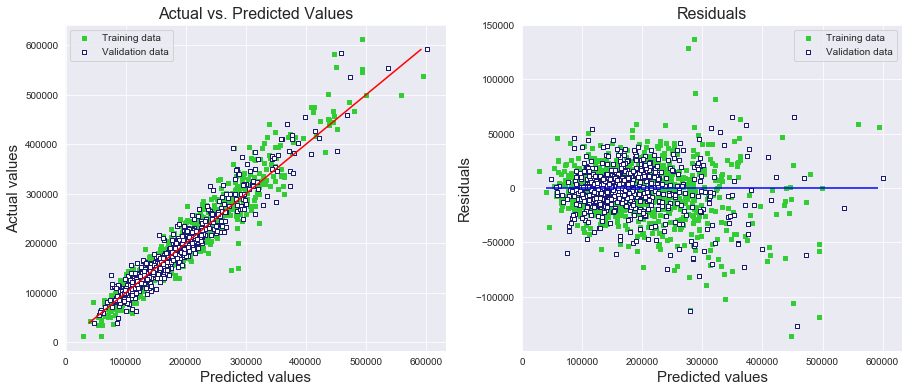

In [438]:
enet3_coef = elastic_net(X_train_scaled, X_test_scaled, y_train, y_test)


## Test on testing data with Elastic Net model



### Set up X and y

In [439]:
# check whether all the 30 feature columns are present in the test dataset
[x for x in top30_enet_rfe if x not in test_dummy.columns]

['MSZoning_A (agr)', 'Neighborhood_GrnHill']

In [440]:
to_drop = ['MSZoning_A (agr)', 'Neighborhood_GrnHill']

# create a new list with the remaining 23 columns present in the test dataset
top30_enet_rfe = [x for x in top30_enet_rfe if x not in to_drop]

In [441]:
# create X_test from the test dataset
X_test = test_dummy[top30_enet_rfe]

# Create X_train and y_train from the train dataset
X_train = train_dummy[top30_enet_rfe]
y_train = train_dummy['SalePrice']

# scale X data
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)


### Run the ElasticNet model to get SalePrice predictions for the test dataset

In [442]:
enet_model = ElasticNetCV(n_alphas=100, l1_ratio=np.linspace(0.01, 1.0, 30), cv=5, random_state=42)
enet_model = enet_model.fit(X_train_scaled, y_train)

optimal_alpha = enet_model.alpha_
optimal_l1ratio = enet_model.l1_ratio_
      
optimal_enet = ElasticNet(alpha = optimal_alpha, l1_ratio = optimal_l1ratio, max_iter=10_000)
optimal_enet.fit(X_train_scaled, y_train)
    
# generate predictions 
predictions = np.exp(optimal_enet.predict(X_test_scaled))

# cross validation score
optimal_enet_mean_R2 = cross_val_score(optimal_enet, X_train_scaled, y_train, cv=5).mean()
optimal_enet_cv_mean_mse = np.abs((-cross_val_score(optimal_enet, X_train_scaled, y_train, cv=5, 
                                                  scoring='neg_mean_squared_error')).mean())      


results = pd.concat([test_dummy[['Id']], pd.DataFrame(predictions,columns=['SalePrice'])], axis=1) 

final_coef_dict = pd.DataFrame({'feature': X_test.columns,
                 'enet_coef': optimal_enet.coef_,
                 'abs_enet_coef': np.abs(optimal_enet.coef_)}).sort_values('abs_enet_coef', ascending=False)  

print('------------ ELASTIC NET ------------')
print('')
print(f'Cross validation mean R2: {optimal_enet_mean_R2:.5f}')
print('')
print(f'Cross validation mean RMSE (logspace): {np.sqrt(optimal_enet_cv_mean_mse):.5f}')
print('--------------------------------------')

------------ ELASTIC NET ------------

Cross validation mean R2: 0.90601

Cross validation mean RMSE (logspace): 0.12683
--------------------------------------


In [443]:
# check results 
results.head()

,Id,SalePrice
0,2658,124504.470915
1,2718,160198.369548
2,2414,218107.258627
3,1989,99891.705341
4,625,168302.576420


In [444]:
results.to_csv('final_sub_1.csv', index=False)

### Kaggle Score 
private 40579
public 22873

Visualise the 28 final predictors

In [445]:
final_coef_dict

,feature,enet_coef,abs_enet_coef
14,TotalSF,0.117087,0.117087
1,OverallQual,0.088543,0.088543
15,HouseAge,-0.061365,0.061365
2,OverallCond,0.050523,0.050523
16,TotalBath,0.032749,0.032749
0,LotArea,0.028240,0.028240
11,Fireplaces,0.025444,0.025444
20,Neighborhood_Crawfor,0.022536,0.022536
7,BsmtFinType1,0.020806,0.020806
24,BldgType_1Fam,0.020526,0.020526


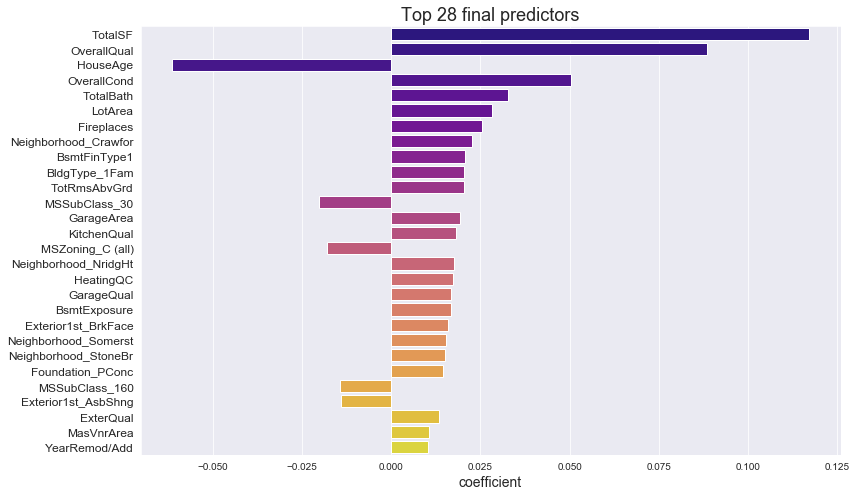

In [447]:
# plot the final 28 predictors
plt.figure(figsize=(12,7))
sns.barplot(data=final_coef_dict, x='enet_coef', y='feature', palette="plasma")
plt.title('Top 28 final predictors', fontsize=18)
plt.xlabel('coefficient', fontsize=14)
plt.ylabel(None)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('final_28_predictors.png')


Conclusion
The Elastic Net model was able to perform consistently well (the mean CV R2 score remained around 0.89) even after cutting the number of features down.

The final model used to make predictions for the actual test dataset produced a CV mean R2 of 0.90601, which means the model was able to explain 90.4% of the variation in SalePrice.

A disadvantage of using an Elastic Net model is that it would require more computational power since we also need to cross-validate the relative weight of L1 vs. L2 penalty, 𝛼. The scope of our analysis still allows us to run the Elastic Net model pretty swiftly, but for larger datasets with more instances and/or features, we might need to experiment with Lasso and/or Ridge instead.

### Interpretation of final selected features

Quantity/quality-related house features

As expected, a higher/better value in these features will almost always increase house value: TotalSF, OverallQual, OverallCond, TotalBath, LotArea, Fireplaces, GarageArea, BsmtFinType1, KitchenQual, HeatingQC, TotRmsAbvGrd, BsmtExposure, ExterQual, GarageQual.
A further investigation we can make is to check what finishings were used on houses with high OverallQual or ExterQual. Homeowners can select finishings with the best benefit-to-cost ratio to use on their houses when renovating, in order to bring about the greatest increment in SalePrice.

#### Physical attributes of the house

According to this model, BldgType_1Fam aka single-family detached houses will fetch higher prices than other types. A cross-reference to the boxplot of SalePrice against BldgType from our initial EDA showed us that there is a greater range of house prices associated with this building type, but that is only natural because most of the houses in our dataset are of this type (82.8%). We have to keep this in mind and avoid wrongly assuming that BldgType_1Fam properties will definitely have higher prices.
Houses with concrete (PConc) foundation are expected to have higher prices according to the model. This is not a conclusion we can make too quickly, as most houses in our dataset have a concrete foundation and we have limited instances with PConc foundation. This is a similar problem as described in point 3.
Exterior1st_BrkFace is positively correlated with SalePrice, suggesting that a brick facade is more popular in Ames.



### Limitations

Limited timeframe: Our data comprised only transactions between 2006–2010. This is a pretty short timeframe, which makes it hard to capture actual general trends in sale prices of houses in Ames. The housing market within the 2006-2010 timeframe could be very different from how it is in present time.
Missing values: There were numerous missing values for which we did a convenient imputation for. This has definitely introduced a certain level of inaccuracy into our analysis.
Limited generalisability to houses outside of Ames, Iowa: The predictive model we've built only applies to the houses in Ames and will not be accurate when applied to houses in other cities or countries. To make it more applicable across the board, we could perhaps remove features specific to houses in the U.S. or Ames, such as replacing Ames' neighborhood with a metric describing a property's distance from the city centre, or whether a property is near a buzzing commercial hub, etc.

### Recommendations to house owners , renovate their house to sell for a higher price . Focus on building front porch for developers